<div style="text-align: center; padding-top:25px">
        <img src="https://raw.githubusercontent.com/5hraddha/misc/467e0a672fe146bef8b3dd384df3db2bc8cfbd2e/images/zyfra-logo.png" style="max-height:150px;" />
    <div style="   padding-top: 25px;
                   font-weight:700;
                   letter-spacing:1px; 
                   line-height:1.2;">
        <p style=" font-size:30px; 
                   color: #28B463;
                   text-transform: uppercase;
                   text-align: center;
                   padding-bottom: 6px;
                   border-bottom: 1px solid #ABEBC6;">Gold Recovery Prediction</p>
        <p style=" margin: 0;
                   padding-top: 6px;
                   font-size:24px;
                   text-align: center;">Optimizing Efficiency in Gold Ore Processing using ML</p>
    </div>
</div>

# Contents <a id='contents'></a>

[1. Contents](#contents)   
[2. Introduction](#introduction)  
[3. Project Goal](#project_goal)  
[4. Initialization](#initialization)  
[5. Load data](#load-data)  
[6. Data Description](#data-description)    
[7. Data Preparation](#data-preparation)  
[8.  Data Analysis](#data-analysis)   
[9. Build the model](#build-the-model)   
[10. Conclusion](#conclusion)

# Introduction <a id='introduction'></a> 
[Back to Contents](#contents)

In the rapidly evolving landscape of heavy industries, efficiency and optimization have become paramount for sustainable growth and profitability. The gold mining sector, in particular, faces _the challenge of extracting maximum value from its raw materials while minimizing wastage and inefficiencies_. To address these challenges, **[Zyfra](https://www.zyfra.com/)**, a pioneering developer of **efficiency solutions for heavy industries**, is aiming to take help of machine learning to optimize the efficiency in Gold Ore processing.  

This project centers around the **application of machine learning to predict the amount of gold that can be recovered from gold ore during the extraction and purification processes**. By accurately forecasting gold recovery rates, mining operations can optimize production, reduce operational costs, and eliminate unprofitable parameters.

Mined ore undergoes primary processing to get the ore mixture or rougher feed, which is the raw material for flotation (also known as the rougher process). After flotation, the material is sent to two-stage purification. 

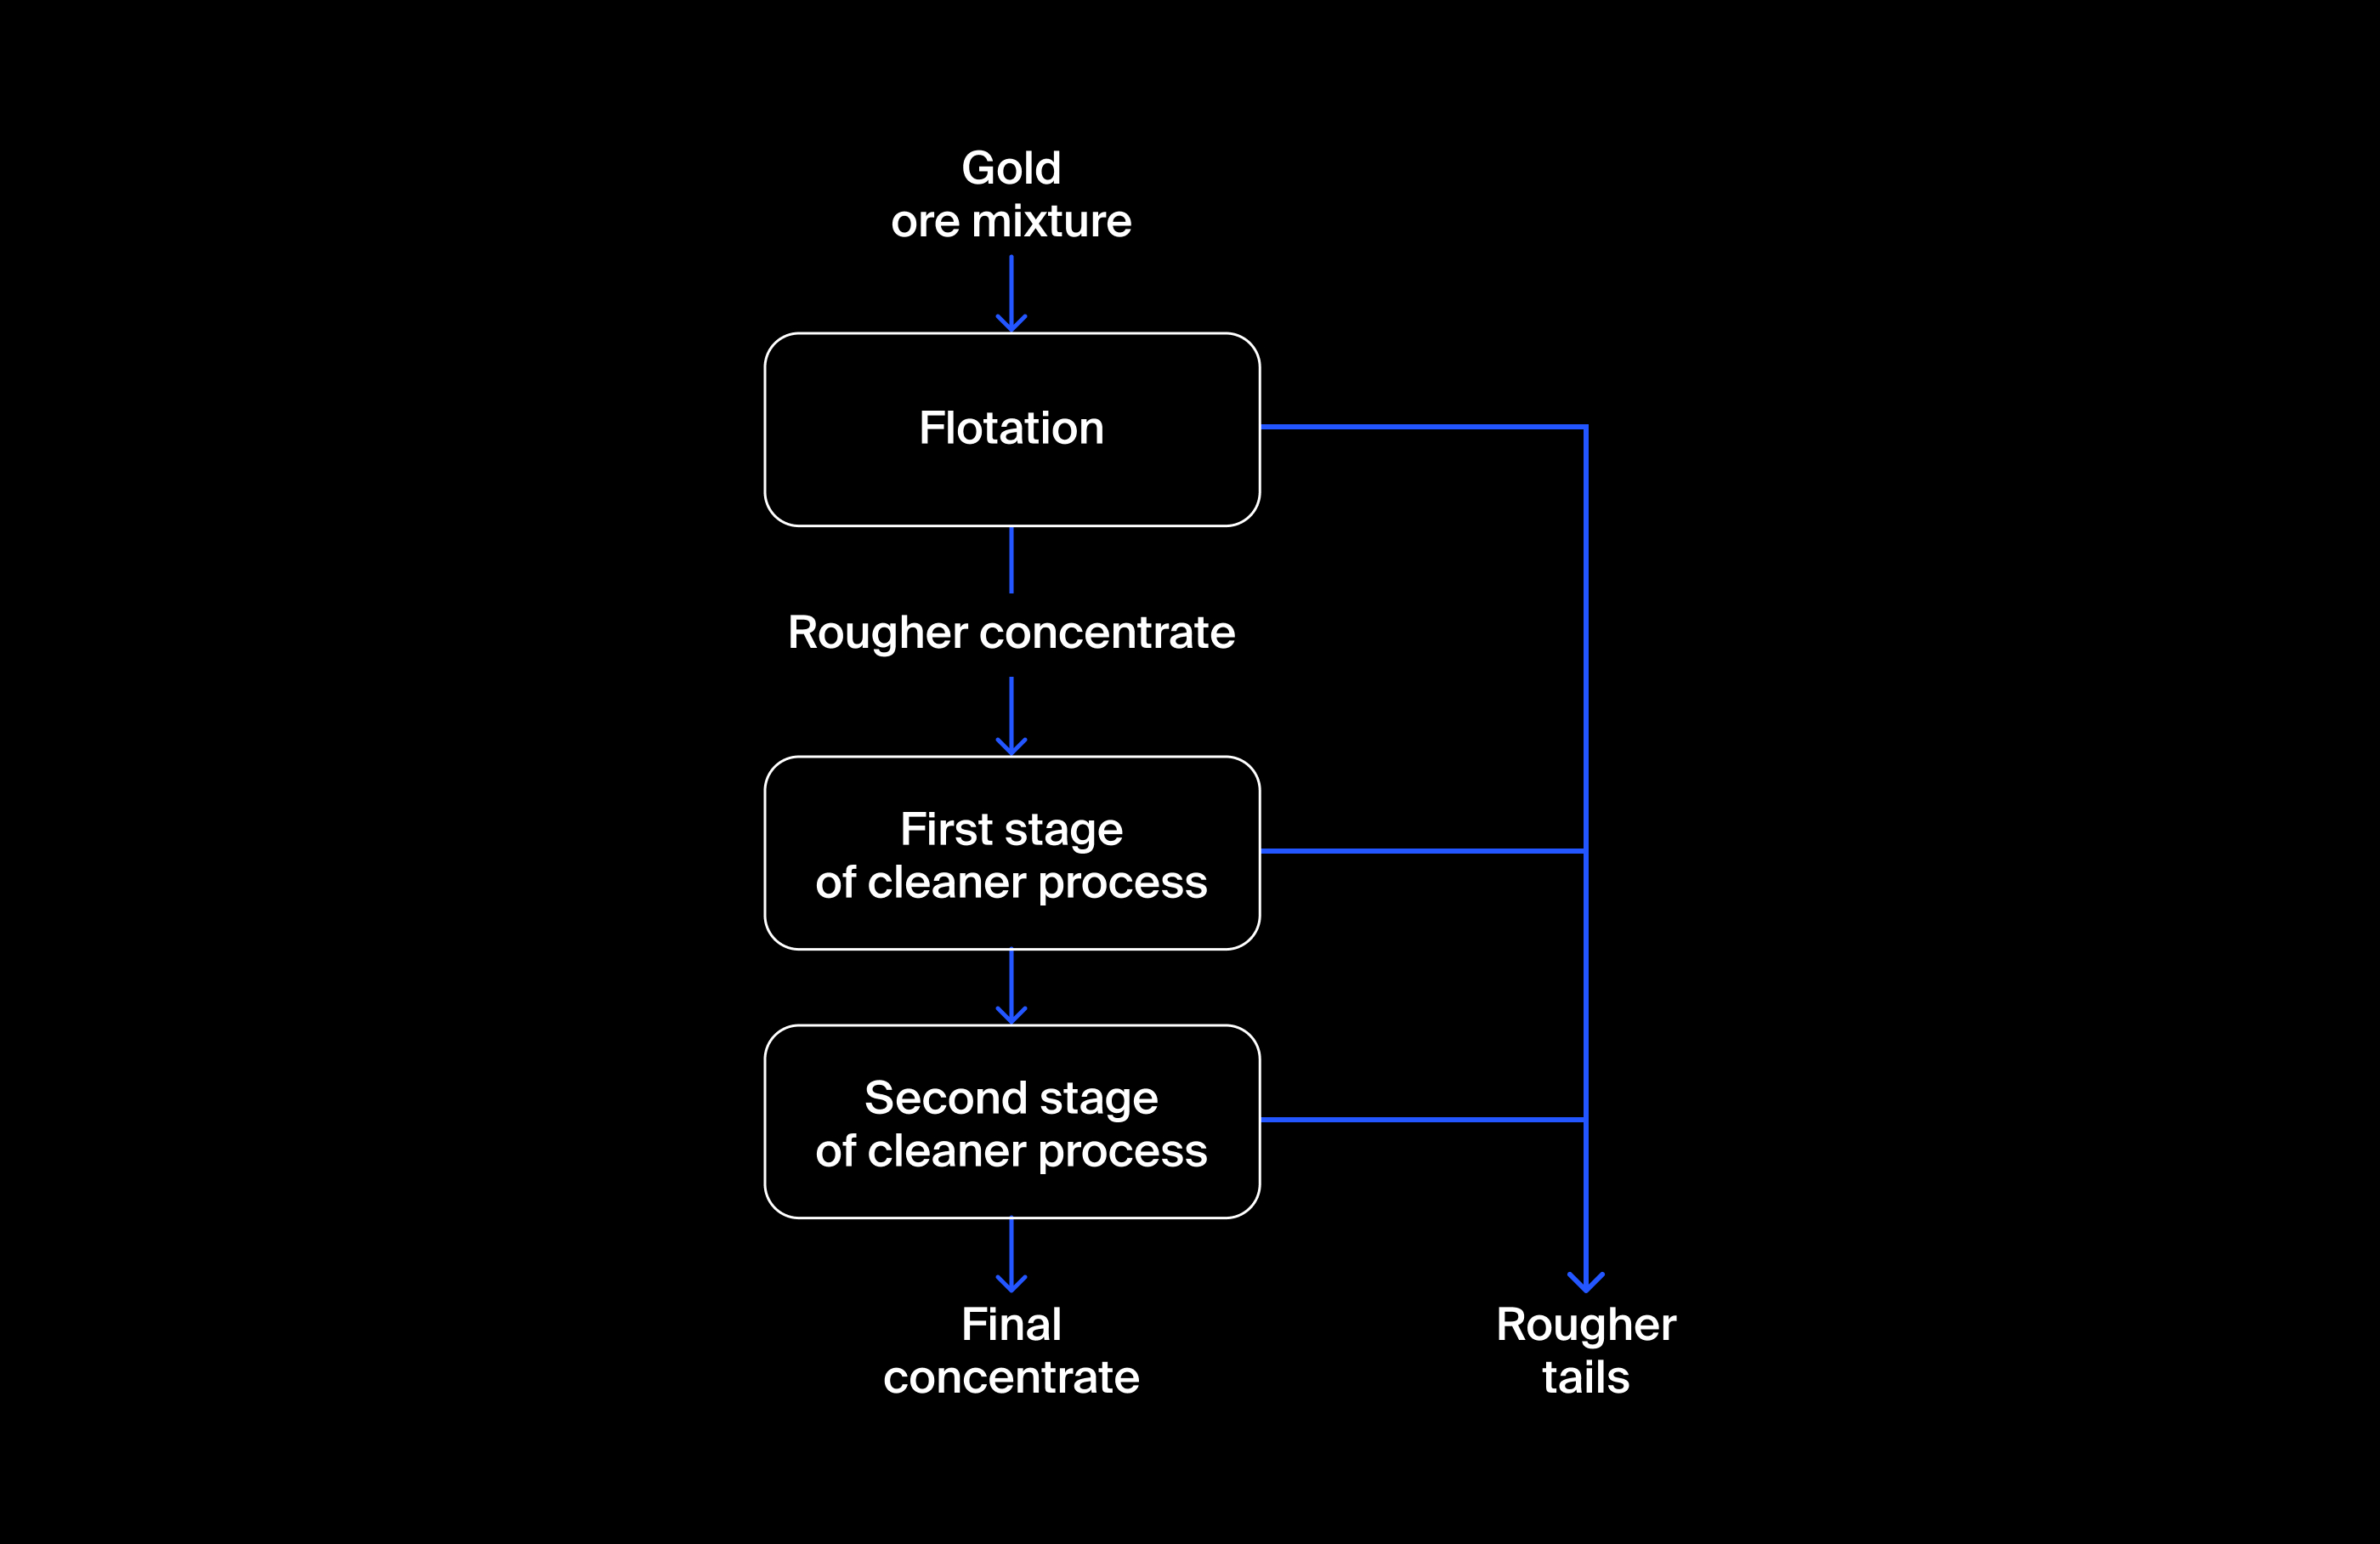

1. **Flotation**
- Gold ore mixture is fed into the float banks to obtain rougher `Au` concentrate and rougher tails (product residues with a low concentration of valuable metals).
- The stability of this process is affected by the volatile and non-optimal physicochemical state of the flotation pulp (a mixture of solid particles and liquid).
2. **Purification**
- The rougher concentrate undergoes two stages of purification. After purification, we have the final concentrate and new tails.

# Project Goal <a id='project-goal'></a> 
[Back to Contents](#contents)

The goals of the project can be outlined as follows:

1. **Gold Recovery Prediction**: The primary objective of the project is to develop accurate machine learning models that can predict the amount of gold that will be recovered from gold ore.

2. **Optimization of Production**: By accurately predicting gold recovery rates, the project aims to optimize the production process in the gold mining sector. This optimization involves identifying factors that contribute to higher recovery rates and reducing those that lead to inefficiencies and wastage.

3. **Elimination of Unprofitable Parameters**: The project aims to identify and eliminate parameters that have a negative impact on gold recovery. This involves using the predictive models to pinpoint specific conditions or stages that result in low recovery rates, enabling mining operations to make informed decisions to eliminate or modify these parameters.

**We need to predict two values**:
1. rougher concentrate recovery `rougher.output.recovery`
2. final concentrate recovery `final.output.recovery`

# 3. Initialization <a id='initialization'></a>  
[Back to Contents](#contents)

In [1]:
# Import base libraries
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Import ML models from scikit-learn
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

# Import other utility functions from scikit-learn
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from joblib import dump, load

Let's also configure the settings in `pandas` such that while printing the records from the dataframe, we can see all the columns. The `display.max_columns` option controls the number of columns to be printed. It receives an `int` or `None`, the latter used to print all the columns:

In [2]:
pd.set_option('display.max_columns', None)

Let's do the same for the rows too:

In [3]:
pd.set_option('display.max_rows', None)

# 4. Load data <a id='load-data'></a>  
[Back to Contents](#contents)

The data is stored in three files:
1. `./datasets/gold_recovery_train.csv` — **training dataset**
2. `./datasets/gold_recovery_test.csv` — **test dataset**
3. `./datasets/gold_recovery_full.csv` — **source dataset**  

Data is indexed with the date and time of acquisition (date feature). Parameters that are next to each other in terms of time are often similar.  

Some parameters are not available because they were measured and/or calculated much later. That's why, some of the features that are present in the training set may be absent from the test set. The test set also doesn't contain targets.  

The source dataset contains the training and test sets with all the features.

In [4]:
# Load the data from the files into seperate dataframes
df_train = pd.read_csv('./datasets/gold_recovery_train.csv')
df_test = pd.read_csv('./datasets/gold_recovery_test.csv')
df_source = pd.read_csv('./datasets/gold_recovery_full.csv')

# 5. Data Description <a id='data-description'></a>  
[Back to Contents](#contents)

Here's how the columns are named in the dataset files (now, our DataFrames):
`[stage].[parameter_type].[parameter_name]`  

**Example**: `rougher.input.feed_ag`. 

**Possible values for `[stage]`**:
- `rougher` — flotation
- `primary_cleaner` — primary purification
- `secondary_cleaner` — secondary purification
- `final` — final characteristics

**Possible values for `[parameter_type]`**:
- `input` — raw material parameters
- `output` — product parameters
- `state` — parameters characterizing the current state of the stage
- `calculation` — calculation characteristics

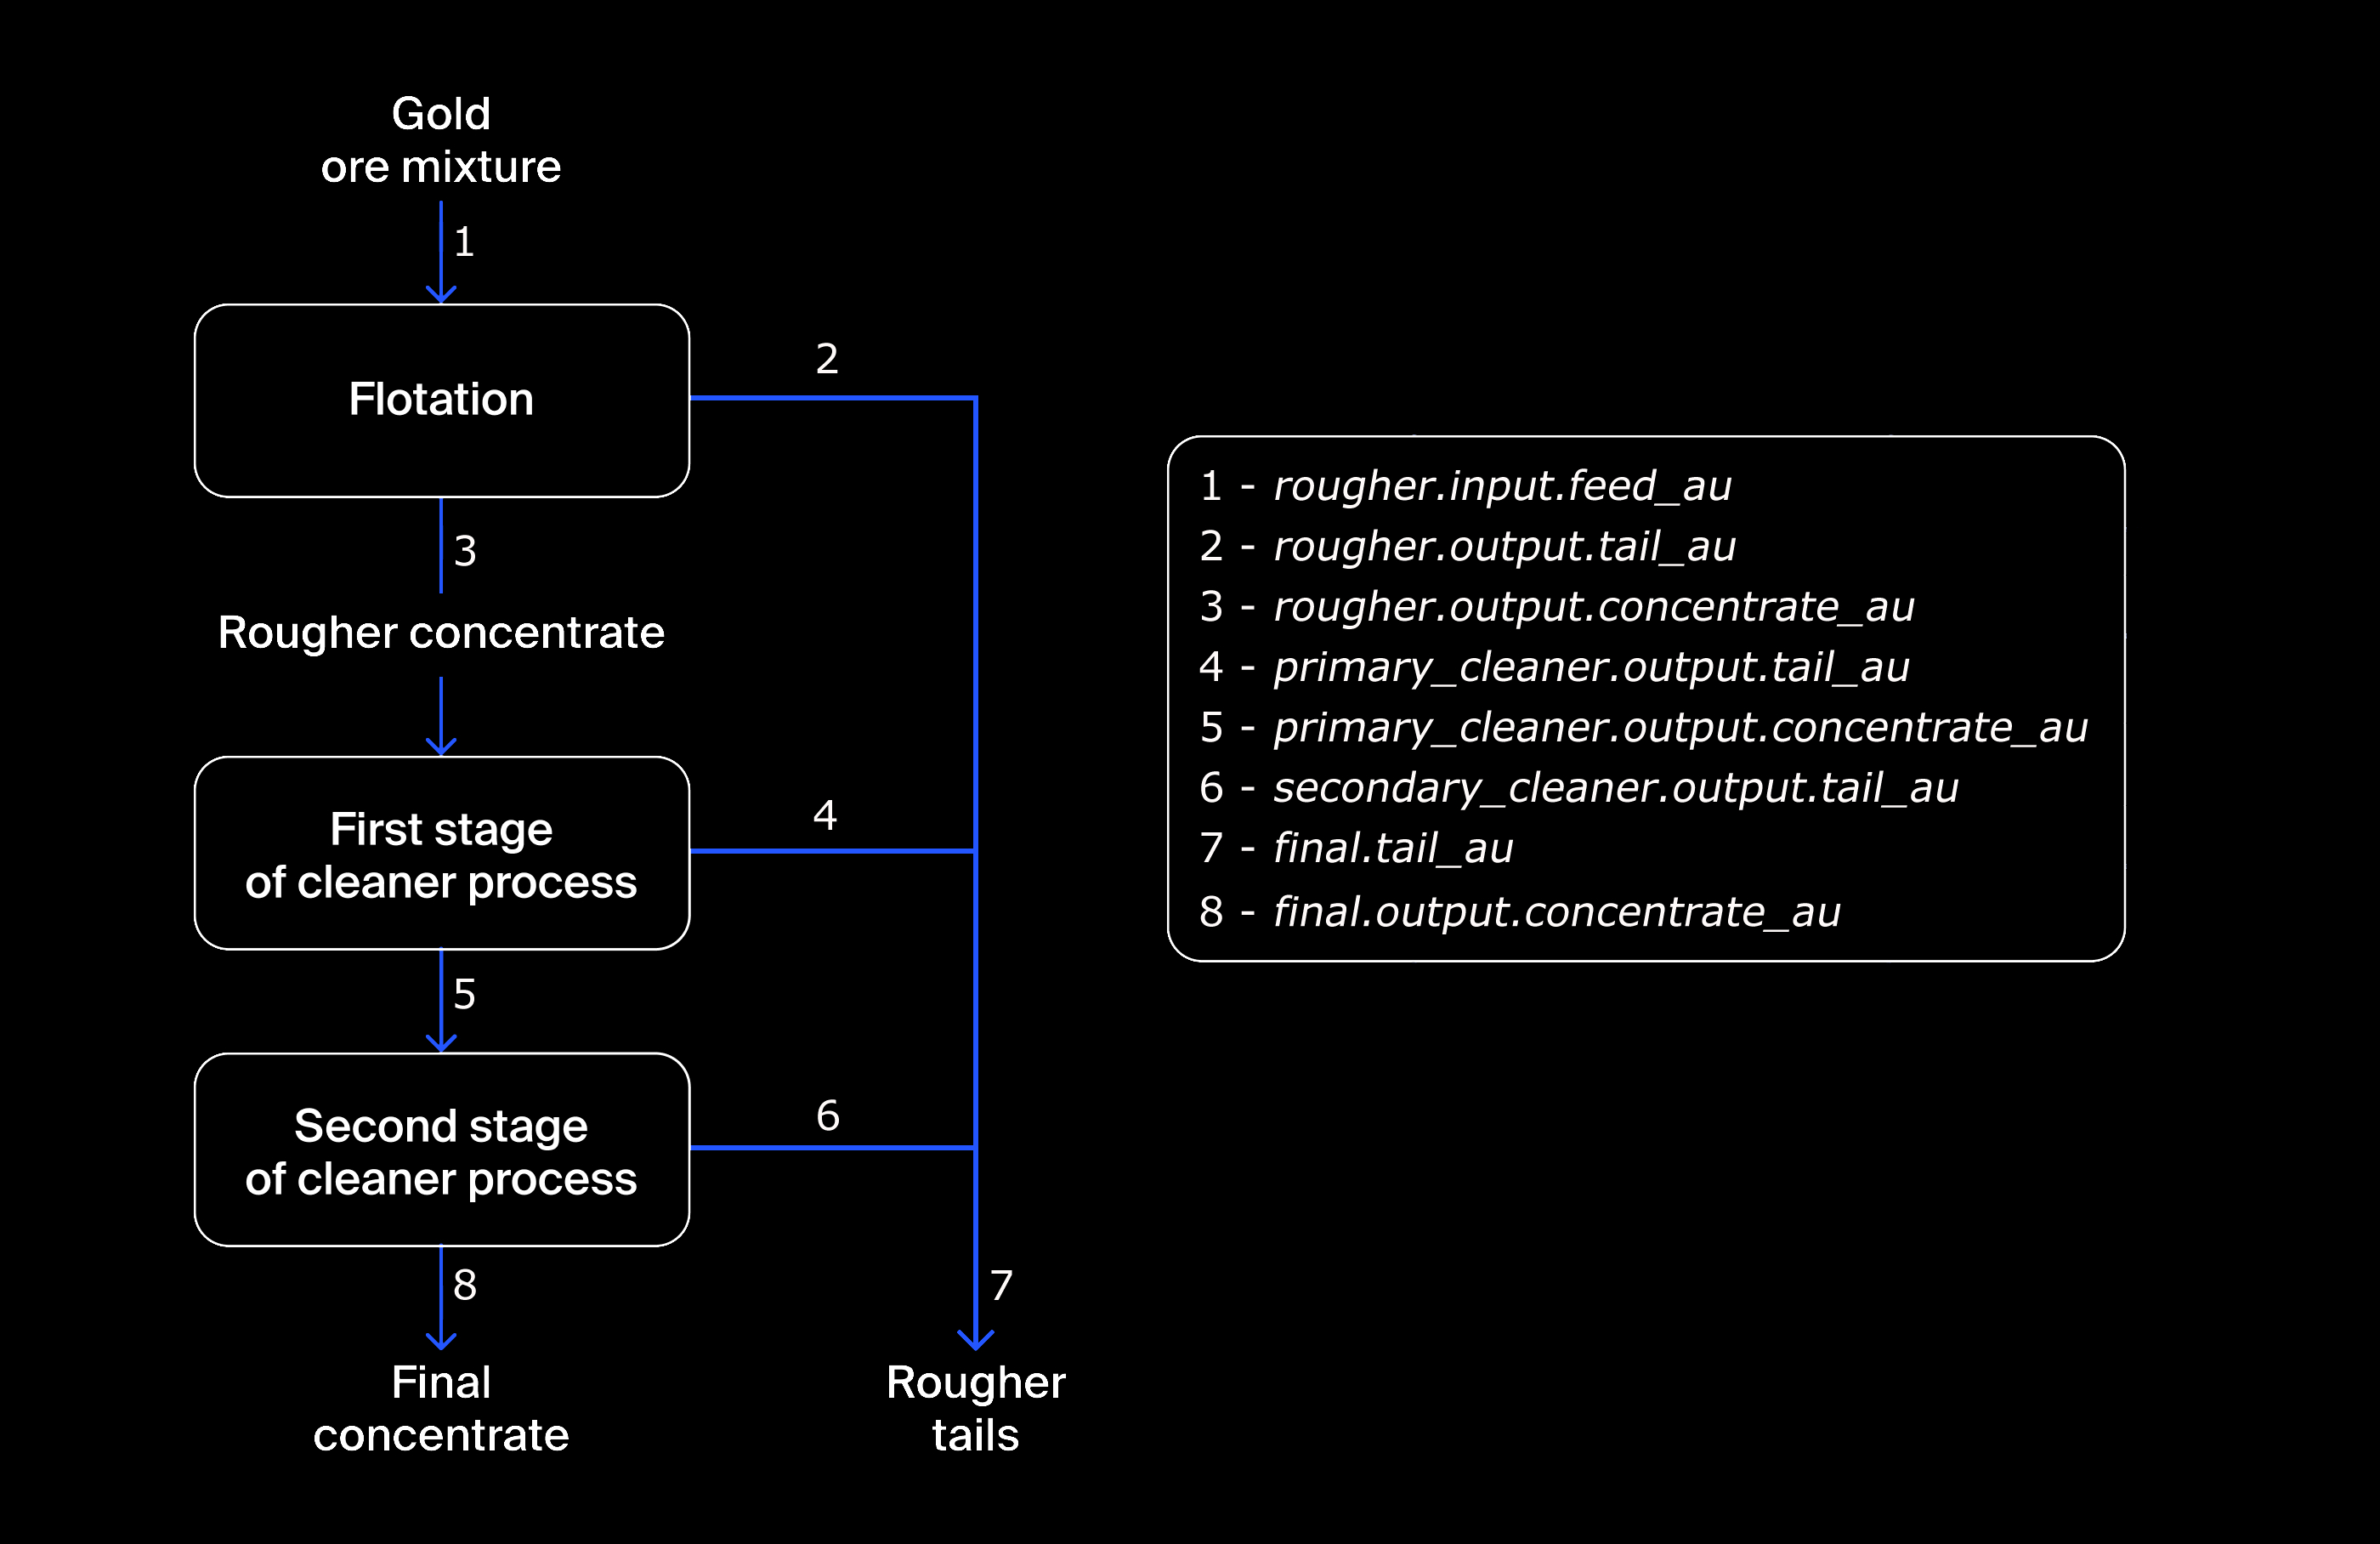

**Technological process**  
- _Rougher feed_ — raw material
- _Rougher additions_ (or reagent additions) — _flotation reagents_: Xanthate, Sulphate, Depressant
- _Xanthate_ — promoter or flotation activator;
- _Sulphate_ — sodium sulphide for this particular process;
- _Depressant_ — sodium silicate.
- _Rougher process_ — flotation
- _Rougher tails_ — product residues
- _Float banks_ — flotation unit
- _Cleaner process_ — purification
- _Rougher Au_ — rougher gold concentrate
- _Final Au_ — final gold concentrate

**Parameters of stages**
- _air amount_ — volume of air
- _fluid levels_
- _feed size_ — feed particle size
- _feed rate_

Let's have a peek into the data in the dataframes.

In [5]:
# Print first five records from df_train
df_train.head()

date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  \
0              0.895447              16.904297              2.143149   
1              0.927452              16.634514              2.224930   
2              0.953716              16.208849              2.257889   
3              0.883763              16.532835              2.146849   
4              0.792826              16.525686              2.055292   

   primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                     127.092003                         10.128295   
1                     125.629232                         10.296251   
2                     123.819808                         11.316280   
3                     122.270188                         11.322140   
4                     117.988169                         11.913613   

   primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                             7.25                        0.988759   
1                             7.25                        1.002663   
2                             7.25                        0.991265   
3                             7.25                        0.996739   
4                             7.25                        1.009869   

   primary_cleaner.output.concentrate_ag  \
0                               8.547551   
1                               8.558743   
2                               8.603505   
3                               7.221879   
4                               9.089428   

   primary_cleaner.output.concentrate_pb  \
0                              10.389648   
1                              10.497069   
2                              10.354494   
3                               8.496563   
4                               9.986786   

   primary_cleaner.output.concentrate_sol  \
0                               19.529297   
1                               19.369147   
2                               19.167579   
3                               15.978538   
4                               19.199864   

   primary_cleaner.output.concentrate_au  primary_cleaner.output.tail_ag  \
0                              34.174427                       14.936526   
1                              34.118526                       16.250511   
2                              33.969464                       16.491823   
3                              28.260743                       16.024359   
4                              33.044932                       16.480185   

   primary_cleaner.output.tail_pb  primary_cleaner.output.tail_sol  \
0                        2.534912                         7.476074   
1                        3.049646                         6.733907   
2                        3.124664                         6.471768   
3             

Wow! Quite a lot of columns. Let's get a **count and list of all the columns in the DataFrame - `df_train`**:

In [6]:
# Get the shape of data in df_train
df_train.shape

(16860, 87)

**We have 87 columns and 16860 rows in the DataFrame - `df_train`.** Let's see what are those columns:

In [7]:
# Get a list of all the columns in df_train
df_train.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

In [8]:
# Print first five records from df_test
df_test.head()

date  primary_cleaner.input.sulfate  \
0  2016-09-01 00:59:59                     210.800909   
1  2016-09-01 01:59:59                     215.392455   
2  2016-09-01 02:59:59                     215.259946   
3  2016-09-01 03:59:59                     215.336236   
4  2016-09-01 04:59:59                     199.099327   

   primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                         14.993118                         8.080000   
1                         14.987471                         8.080000   
2                         12.884934                         7.786667   
3                         12.006805                         7.640000   
4                         10.682530                         7.530000   

   primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                        1.005021                             1398.981301   
1                        0.990469                             1398.777912   
2                        0.996043                             1398.493666   
3                        0.863514                             1399.618111   
4                        0.805575                             1401.268123   

   primary_cleaner.state.floatbank8_a_level  \
0                               -500.225577   
1                               -500.057435   
2                               -500.868360   
3                               -498.863574   
4                               -500.808305   

   primary_cleaner.state.floatbank8_b_air  \
0                             1399.144926   
1                             1398.055362   
2                             1398.860436   
3                             1397.440120   
4                             1398.128818   

   primary_cleaner.state.floatbank8_b_level  \
0                               -499.919735   
1                               -499.778182   
2                               -499.764529   
3                               -499.211024   
4                               -499.504543   

   primary_cleaner.state.floatbank8_c_air  \
0                             1400.102998   
1                             1396.151033   
2                             1398.075709   
3                             1400.129303   
4                             1402.172226   

   primary_cleaner.state.floatbank8_c_level  \
0                               -500.704369   
1                               -499.240168   
2                               -502.151509   
3                               -498.355873   
4                               -500.810606   

   primary_cleaner.state.floatbank8_d_air  \
0                             1399.001695   
1                             1399.508091   
2                             1399.497088   
3                             1401.065165   
4                             1399.480508   

   primary_cleaner.state.floatbank8_d_level  rougher.input.feed_ag  \
0                               -499.485144              13.128569   
1                               -500.416324              13.036280   
2                               -499.715479              13.138412   
3                               -501.038738              12.400507   
4                               -499.374053              11.327427   

   rougher.input.feed_pb  rougher.input.feed_rate  rougher.input.feed_size  \
0               5.636710               489.793655                62.710452   
1               5.526065               490.104534                61.961163   
2               5.426561               489.617969                66.903807   
3               5.114758               476.618130                59.865919   
4               4.767383               488.248117                63.315324   

   rougher.input.feed_sol  rougher.input.feed_au  \
0               42.022440              12.084103   
1               41.187903              11.918977   
2               42.546294              12.091332   
3               41.

Wow! Quite a lot of columns again. Let's get a **count and list of all the columns in the DataFrame - `df_test`**:

In [9]:
# Get the shape of data in df_test
df_test.shape

(5856, 53)

**We have 53 columns and 5856 rows in the DataFrame - `df_test`.** Let's see what are those columns:

In [10]:
# Get a list of all the columns in df_test
df_test.columns

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

As mentioned earlier, some parameters are not available because they were measured and/or calculated much later. That's why, **some of the features that are present in the training set may be absent from the test set. The test set also doesn't contain targets**. Let's see what are the columns that are not present in our test data:

In [11]:
# Columns that are present in df_train but not in df_test
cols_not_present_in_test = df_train.columns.difference(df_test.columns).to_list()
display(cols_not_present_in_test)

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Let's go to the final DataFrame - `df_source`:

In [12]:
# Print first five records from df_source
df_source.head()

date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  \
0              0.895447              16.904297              2.143149   
1              0.927452              16.634514              2.224930   
2              0.953716              16.208849              2.257889   
3              0.883763              16.532835              2.146849   
4              0.792826              16.525686              2.055292   

   primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                     127.092003                         10.128295   
1                     125.629232                         10.296251   
2                     123.819808                         11.316280   
3                     122.270188                         11.322140   
4                     117.988169                         11.913613   

   primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                             7.25                        0.988759   
1                             7.25                        1.002663   
2                             7.25                        0.991265   
3                             7.25                        0.996739   
4                             7.25                        1.009869   

   primary_cleaner.output.concentrate_ag  \
0                               8.547551   
1                               8.558743   
2                               8.603505   
3                               7.221879   
4                               9.089428   

   primary_cleaner.output.concentrate_pb  \
0                              10.389648   
1                              10.497069   
2                              10.354494   
3                               8.496563   
4                               9.986786   

   primary_cleaner.output.concentrate_sol  \
0                               19.529297   
1                               19.369147   
2                               19.167579   
3                               15.978538   
4                               19.199864   

   primary_cleaner.output.concentrate_au  primary_cleaner.output.tail_ag  \
0                              34.174427                       14.936526   
1                              34.118526                       16.250511   
2                              33.969464                       16.491823   
3                              28.260743                       16.024359   
4                              33.044932                       16.480185   

   primary_cleaner.output.tail_pb  primary_cleaner.output.tail_sol  \
0                        2.534912                         7.476074   
1                        3.049646                         6.733907   
2                        3.124664                         6.471768   
3             

Let's get a **count and list of all the columns in the DataFrame - `df_source`**:

In [13]:
# Get the shape of the data in df_source
df_source.shape

(22716, 87)

Okay! **We have 87 columns and 22716 rows in `df_source` DataFrame** So, as stated earlier, since the source dataset contains the training and test sets with all the features, we can safely assume that it has all the 87 columns of the training dataset.

# 6. Data Preparation <a id='data-preparation'></a>  
[Back to Contents](#contents)

## Check that recovery is calculated correctly <a id='check-recovery-calculation'></a>  
[Back to Contents](#contents)

Let check that recovery is calculated correctly. The recovery process is simulated using:

Let's write a function to calculate recovery using the above formula:

In [14]:
def calculate_recovery(df, C, F, T):
    
    """
    This function calculates gold recovery.
    
    To calculate rougher recovery, this function need four inputs:
    - df = DataFrame where the the columns are present
    - C = share of gold in the concentrate right after flotation
    - F = share of gold in the feed before flotation
    - T = share of gold in the rougher tails right after flotation
    
    This function returns the percentage recovery of gold concentrate after the roughing stage.
    """
    
    recovery = (df[C]*(df[F]-df[T])) / (df[F]*(df[C]-df[T])) * 100
    
    return recovery

Before calculating recovery, **let's first drop all the missing values from the features we are using to calculate the recovery and to calculate the MAE**. In order to calculate the rougher recovery as requested, we would need the following three features from the training dataset - `df_train`:
- C = share of gold in the concentrate right after flotation - `rougher.output.concentrate_au`
- F = share of gold in the feed before flotation - `rougher.input.feed_au`
- T = share of gold in the rougher tails right after flotation - `rougher.output.tail_au`

And, we have to find MAE between our calculations and the values of `rougher.output.recovery` feature of the training dataset - `df_train`.

So, let's get rid of all the missing values from `rougher.output.concentrate_au`, `rougher.input.feed_au`, `rougher.output.tail_au` and `rougher.output.recovery` features:

In [15]:
# Drop all the missing values from the four columns and save the new DataFrame
df_train_recovery_calc_subset = df_train.dropna(subset=['rougher.output.recovery', 'rougher.output.concentrate_au', 'rougher.input.feed_au','rougher.output.tail_au']) 

In [16]:
# Check the info about df_train_recovery_calc_subset[['rougher.output.recovery', 'rougher.output.concentrate_au', 'rougher.input.feed_au','rougher.output.tail_au']]
df_train_recovery_calc_subset[['rougher.output.recovery', 'rougher.output.concentrate_au', 'rougher.input.feed_au','rougher.output.tail_au']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14287 entries, 0 to 16859
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rougher.output.recovery        14287 non-null  float64
 1   rougher.output.concentrate_au  14287 non-null  float64
 2   rougher.input.feed_au          14287 non-null  float64
 3   rougher.output.tail_au         14287 non-null  float64
dtypes: float64(4)
memory usage: 558.1 KB


In [17]:
# Check if we have any missing values in df_train_recovery_calc_subset['rougher.output.recovery']
df_train_recovery_calc_subset['rougher.output.recovery'].isna().sum()

0

In [18]:
# Check if we have any missing values in df_train_recovery_calc_subset['rougher.output.concentrate_au']
df_train_recovery_calc_subset['rougher.output.concentrate_au'].isna().sum()

0

In [19]:
# Check if we have any missing values in df_train_recovery_calc_subset['rougher.input.feed_au']
df_train_recovery_calc_subset['rougher.input.feed_au'].isna().sum()

0

In [20]:
# Check if we have any missing values in df_train_recovery_calc_subset['rougher.output.tail_au']
df_train_recovery_calc_subset['rougher.output.tail_au'].isna().sum()

0

Great! so, now since we have got rid of all the missing values, let's calculate the recovery using our function - `calculate_recovery`:

In [21]:
# Calculate recovery for the rougher.output.recovery feature using the training set
calculated_recovery = calculate_recovery(df_train_recovery_calc_subset, 'rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au')
calculated_recovery.head(10)

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
5    88.156912
6    88.168065
7    87.668336
8    87.035862
9    87.650868
dtype: float64

Now, let's calculate the **Mean Absolute Error (MAE)** between our calculations (stored in `calculated_recovery`) and the feature values in `df_train_recovery_calc_subset['rougher.output.recovery']`:

In [22]:
# Calculate Mean Absolute Error (MAE)
mean_absolute_error(df_train_recovery_calc_subset['rougher.output.recovery'], calculated_recovery)

9.303415616264301e-15

The fact that the **Mean Absolute Error (MAE)** between our calculated recovery values and the provided feature values - `df_train_recovery_calc_subset['rougher.output.recovery']` is approximately `9.303415616264301e-15` (which is extremely close to zero) suggests that **our calculations are nearly identical to the provided feature values for `rougher.output.recovery`**. 

## Analyze the features not available in the test set <a id='analyze-the-features'></a>  
[Back to Contents](#contents)

Some parameters are not available because they were measured and/or calculated much later. That's why, **some of the features that are present in the training set may be absent from the test set**. The test set also doesn't contain targets. We already have calculated a list of all the features that are present in the training set but not in the test set - `cols_not_present_in_test`:

In [23]:
# Columns that are present in df_train_columns but not in df_test_columns
display(cols_not_present_in_test)

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [24]:
# No of columns/ features not present in test set
len(cols_not_present_in_test)

34

Great! We have 34 features not present in test set. And it looks like **the features that are not included in the test set are all -'output'_ and _'calculation'_ types**. The absence of the 'output' and 'calculation' type features in the test set suggests that these features are likely derived or calculated from the measured data rather than being directly measured themselves. As a result, **these features should be excluded from the training process when developing ML models.** These features should be removed from the training set prior to training models. We'll do that in the later stage.

Great! So, now we have (87 - 34) = 53 columns/features in the training set - `df_train`.

## Look for missing values <a id='look-for-missing-values'></a>  
[Back to Contents](#contents)

Let's look for the missing values in all the DataFrames. We'll make use of a functions to analyze the percent of missing values in the DataFrames:

In [25]:
def get_missing_values_report_of_df(dataset_name: str, df: pd.DataFrame):
    """
        This function:
        1. takes a DataFrame as an input.
        2. calculates the missing value information & creates report.
        3. prints the information & report.
    """
    # Calculate the number of missing values in all the columns of the DataFrame
    no_of_missing_values_per_col = df.isna().sum()
    
    # Get total number of records / observations in the DataFrame
    total_no_of_rows = df.shape[0]
    
    # Calculate the percentage of missing values in all the columns of the DataFrame
    percentage_of_missing_values_per_col = round((no_of_missing_values_per_col / total_no_of_rows) * 100, 2)
    
    # Create a new DataFrame having both number of missing values & percentage of missing values in all the columns
    df_missing_values = pd.concat([no_of_missing_values_per_col, percentage_of_missing_values_per_col], axis=1)
    df_missing_values = df_missing_values.rename(columns={0: 'No of Missing Values', 1: 'Percentage of Missing Values'})
    
    # Sort the new DataFrame according to teh Percentage of Missing Values in descedning order
    df_missing_values = df_missing_values.sort_values(by='Percentage of Missing Values', ascending=False)
    
    # Prints the missing value stats
    print('----------------------------------------------------------------------------')
    print(f'                {dataset_name} Missing Values Report')
    print('----------------------------------------------------------------------------')
    print(f'Total number of rows: {total_no_of_rows}')
    print(f'Total number of columns: {df.shape[1]}')
    print()
    print('Information on the Number & Percentage of Missing Values in the DataFrame')
    display(df_missing_values)
    
    # Set bar plot style properties
    sns.set(rc = {'figure.figsize':(18.0, 40.0)})
    sns.set(font_scale = 1.2)
    
    # Plot bar chart for the missing values
    ax = sns.barplot(x=df_missing_values['Percentage of Missing Values'], y=df_missing_values.index, orient='h')
    ax.set(title='Percentage of Missing Values in the DataFrame')
    plt.show()

Awesome! We have three datasets - `df_train`, `df_test` and `df_source`. Let's run this report on all the three of them:

----------------------------------------------------------------------------
                Training Dataset Missing Values Report
----------------------------------------------------------------------------
Total number of rows: 16860
Total number of columns: 87

Information on the Number & Percentage of Missing Values in the DataFrame


No of Missing Values  \
rougher.output.recovery                                             2573   
rougher.output.tail_ag                                              2250   
rougher.output.tail_sol                                             2249   
rougher.output.tail_au                                              2249   
secondary_cleaner.output.tail_sol                                   1986   
rougher.input.floatbank11_xanthate                                  1904   
final.output.recovery                                               1521   
primary_cleaner.input.sulfate                                       1307   
primary_cleaner.input.depressant                                    1262   
rougher.calculation.au_pb_ratio                                     1242   
rougher.input.floatbank10_sulfate                                   1044   
primary_cleaner.input.xanthate                                       985   
primary_cleaner.output.concentrate_sol                               636   
rougher.input.floatbank11_sulfate                                    623   
rougher.state.floatbank10_e_air                                      603   
rougher.input.feed_rate                                              513   
rougher.input.feed_size                                              417   
final.output.concentrate_sol                                         370   
secondary_cleaner.state.floatbank2_a_air                             363   
primary_cleaner.output.concentrate_pb                                358   
rougher.input.floatbank10_xanthate                                   346   
rougher.input.feed_sol                                               292   
primary_cleaner.output.tail_sol                                      281   
rougher.input.feed_pb                                                228   
final.output.tail_pb                                                 183   
rougher.output.concentrate_sol                                       162   
secondary_cleaner.state.floatbank2_b_air                             155   
final.output.tail_sol                                                145   
secondary_cleaner.state.floatbank4_a_air                             129   
secondary_cleaner.state.floatbank3_a_level                           113   
secondary_cleaner.state.floatbank4_a_level                           113   
secondary_cleaner.state.floatbank2_b_level                           112   
secondary_cleaner.state.floatbank3_b_level                           110   
secondary_cleaner.state.floatbank2_a_level                           109   
secondary_cleaner.state.floatbank3_b_air                             108   
secondary_cleaner.state.floatbank6_a_air                             103   
primary_cleaner.output.tail_pb                                        99   
secondary_cleaner.state.floatbank3_a_air                              97   
secondary_cleaner.output.tail_pb                                      96   
secondary_cleaner.state.floatbank4_b_air                              92   
secondary_cleaner.state.floatbank4_b_level                            93   
secondary_cleaner.output.tail_ag                                      84   
secondary_cleaner.state.floatbank5_b_level                            84   
secondary_cleaner.state.floatbank5_a_air                              85   
secondary_cleaner.state.floatbank5_a_level                            85   
secondary_cleaner.state.floatbank5_b_air                              85   
secondary_cleaner.state.floatbank6_a_level                            85   
rougher.output.concentrate_au                                         82   
rougher.input.feed_ag                                                 82   
primary_cleaner.output.tail_au                                        83   
primary_cleaner.output.concentrate_ag                                 82   
secondary_cleaner.output.tail_au                                      82   
rougher.output.concentra

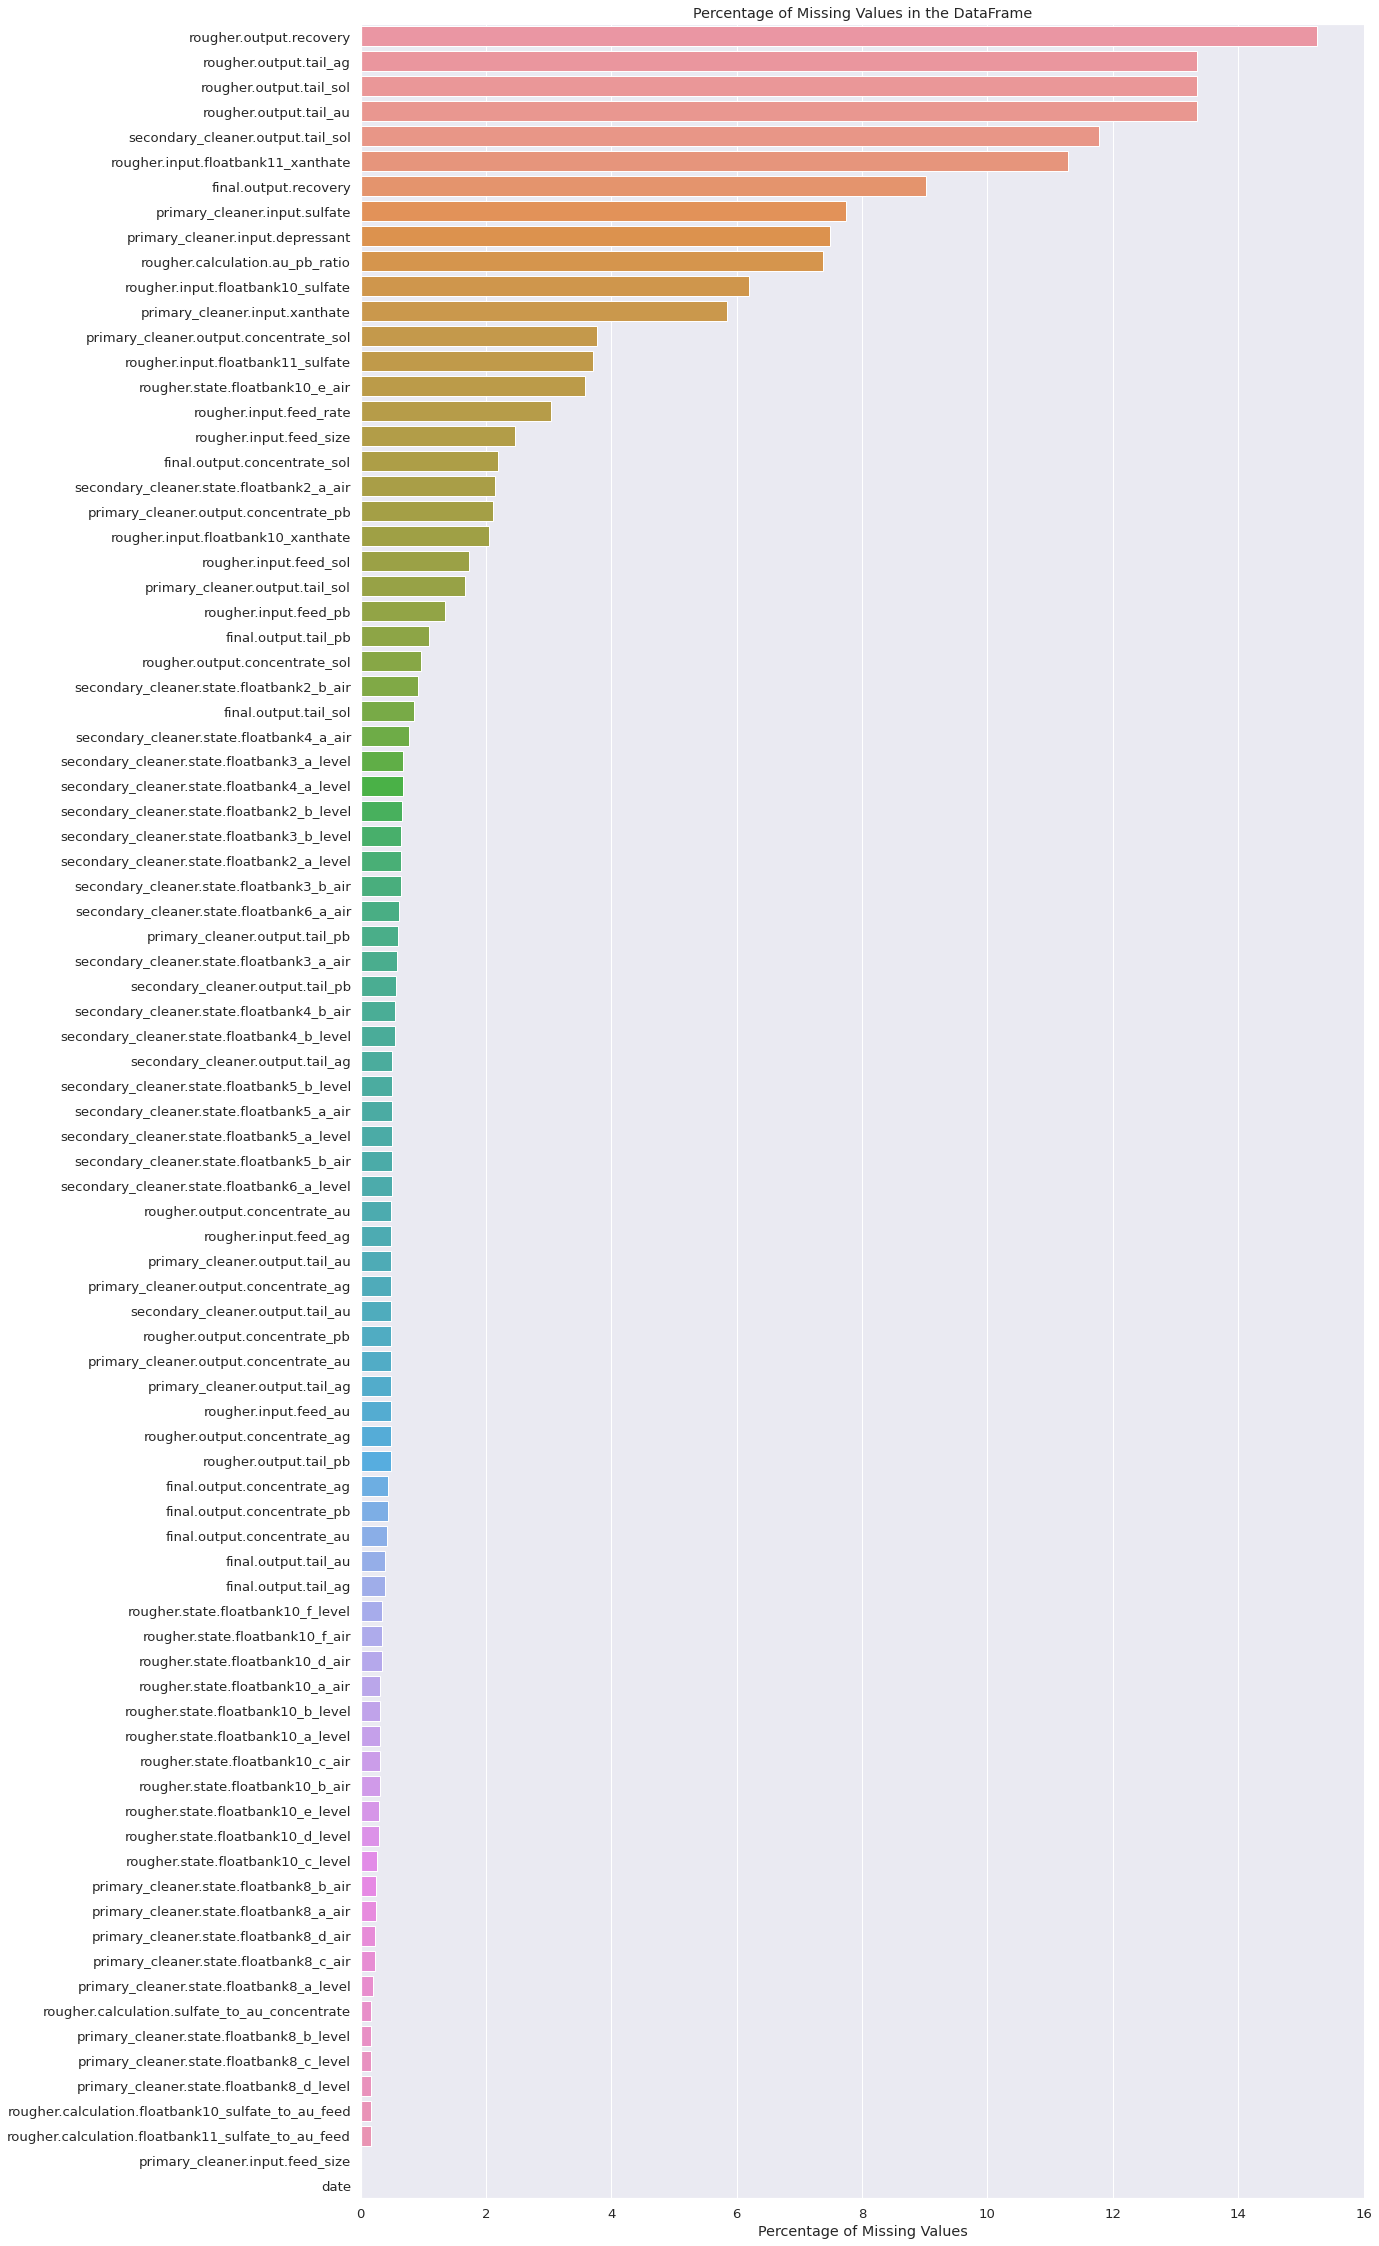

----------------------------------------------------------------------------
                Test Dataset Missing Values Report
----------------------------------------------------------------------------
Total number of rows: 5856
Total number of columns: 53

Information on the Number & Percentage of Missing Values in the DataFrame


No of Missing Values  \
rougher.input.floatbank11_xanthate                           353   
primary_cleaner.input.sulfate                                302   
primary_cleaner.input.depressant                             284   
rougher.input.floatbank10_sulfate                            257   
primary_cleaner.input.xanthate                               166   
rougher.input.floatbank10_xanthate                           123   
rougher.input.feed_sol                                        67   
rougher.input.floatbank11_sulfate                             55   
rougher.input.feed_rate                                       40   
secondary_cleaner.state.floatbank3_a_air                      34   
secondary_cleaner.state.floatbank2_b_air                      23   
rougher.input.feed_size                                       22   
secondary_cleaner.state.floatbank2_a_air                      20   
rougher.state.floatbank10_a_air                               17   
rougher.state.floatbank10_c_air                               17   
rougher.state.floatbank10_d_air                               17   
rougher.state.floatbank10_e_air                               17   
rougher.state.floatbank10_b_air                               17   
rougher.state.floatbank10_f_air                               17   
secondary_cleaner.state.floatbank3_a_level                    16   
secondary_cleaner.state.floatbank3_b_air                      16   
secondary_cleaner.state.floatbank3_b_level                    16   
secondary_cleaner.state.floatbank4_a_air                      16   
secondary_cleaner.state.floatbank4_a_level                    16   
secondary_cleaner.state.floatbank4_b_air                      16   
secondary_cleaner.state.floatbank4_b_level                    16   
secondary_cleaner.state.floatbank5_a_air                      16   
secondary_cleaner.state.floatbank5_a_level                    16   
secondary_cleaner.state.floatbank2_b_level                    16   
secondary_cleaner.state.floatbank5_b_air                      16   
secondary_cleaner.state.floatbank5_b_level                    16   
secondary_cleaner.state.floatbank6_a_air                      16   
secondary_cleaner.state.floatbank2_a_level                    16   
rougher.state.floatbank10_b_level                             16   
secondary_cleaner.state.floatbank6_a_level                    16   
rougher.state.floatbank10_f_level                             16   
rougher.state.floatbank10_e_level                             16   
primary_cleaner.state.floatbank8_a_air                        16   
primary_cleaner.state.floatbank8_a_level                      16   
primary_cleaner.state.floatbank8_b_air                        16   
primary_cleaner.state.floatbank8_b_level                      16   
primary_cleaner.state.floatbank8_c_air                        16   
primary_cleaner.state.floatbank8_c_level                      16   
primary_cleaner.state.floatbank8_d_air                        16   
primary_cleaner.state.floatbank8_d_level                      16   
rougher.input.feed_ag                                         16   
rougher.input.feed_pb                                         16   
rougher.input.feed_au                                         16   
rougher.state.floatbank10_a_level                             16   
rougher.state.floatbank10_c_level                             16   
rougher.state.floatbank10_d_level                             16   
primary_cleaner.input.feed_size                                0   
date                                                           0   

                                            Percentage of Missing Values  
rougher.input.floatbank11_xanthate                                  6.03  
primary_cleaner.input.sulfate                                       5.16  
primary_cleaner.input.depressant                                    4.85  
rougher.input.floatbank10_sulfate                                   4.3

----------------------------------------------------------------------------
                Source Dataset Missing Values Report
----------------------------------------------------------------------------
Total number of rows: 22716
Total number of columns: 87

Information on the Number & Percentage of Missing Values in the DataFrame


No of Missing Values  \
rougher.output.recovery                                             3119   
rougher.output.tail_ag                                              2737   
rougher.output.tail_au                                              2736   
rougher.output.tail_sol                                             2736   
rougher.input.floatbank11_xanthate                                  2257   
secondary_cleaner.output.tail_sol                                   2215   
final.output.recovery                                               1963   
rougher.calculation.au_pb_ratio                                     1627   
primary_cleaner.input.sulfate                                       1609   
primary_cleaner.input.depressant                                    1546   
rougher.input.floatbank10_sulfate                                   1301   
primary_cleaner.input.xanthate                                      1151   
primary_cleaner.output.concentrate_sol                               798   
rougher.input.floatbank11_sulfate                                    678   
rougher.state.floatbank10_e_air                                      620   
rougher.input.feed_rate                                              553   
rougher.input.floatbank10_xanthate                                   469   
primary_cleaner.output.concentrate_pb                                448   
rougher.input.feed_size                                              439   
secondary_cleaner.state.floatbank2_a_air                             383   
final.output.concentrate_sol                                         385   
rougher.input.feed_sol                                               359   
primary_cleaner.output.tail_sol                                      351   
final.output.tail_sol                                                271   
rougher.input.feed_pb                                                244   
final.output.tail_pb                                                 200   
rougher.output.concentrate_sol                                       190   
secondary_cleaner.state.floatbank2_b_air                             178   
secondary_cleaner.state.floatbank4_a_air                             145   
secondary_cleaner.state.floatbank3_a_air                             131   
secondary_cleaner.state.floatbank3_a_level                           129   
secondary_cleaner.state.floatbank4_a_level                           129   
secondary_cleaner.state.floatbank2_b_level                           128   
secondary_cleaner.state.floatbank3_b_level                           126   
secondary_cleaner.state.floatbank3_b_air                             124   
secondary_cleaner.state.floatbank2_a_level                           125   
primary_cleaner.output.tail_pb                                       122   
secondary_cleaner.state.floatbank6_a_air                             119   
secondary_cleaner.output.tail_pb                                     116   
secondary_cleaner.state.floatbank4_b_air                             108   
secondary_cleaner.state.floatbank4_b_level                           109   
primary_cleaner.output.tail_ag                                       102   
secondary_cleaner.output.tail_ag                                     100   
secondary_cleaner.state.floatbank5_a_air                             101   
secondary_cleaner.state.floatbank5_a_level                           101   
secondary_cleaner.state.floatbank5_b_air                             101   
secondary_cleaner.state.floatbank5_b_level                           100   
secondary_cleaner.state.floatbank6_a_level                           101   
primary_cleaner.output.tail_au                                        99   
rougher.input.feed_au                                                 99   
primary_cleaner.output.concentrate_ag                                 98   
secondary_cleaner.output.tail_au                                      98   
rougher.output.concentra

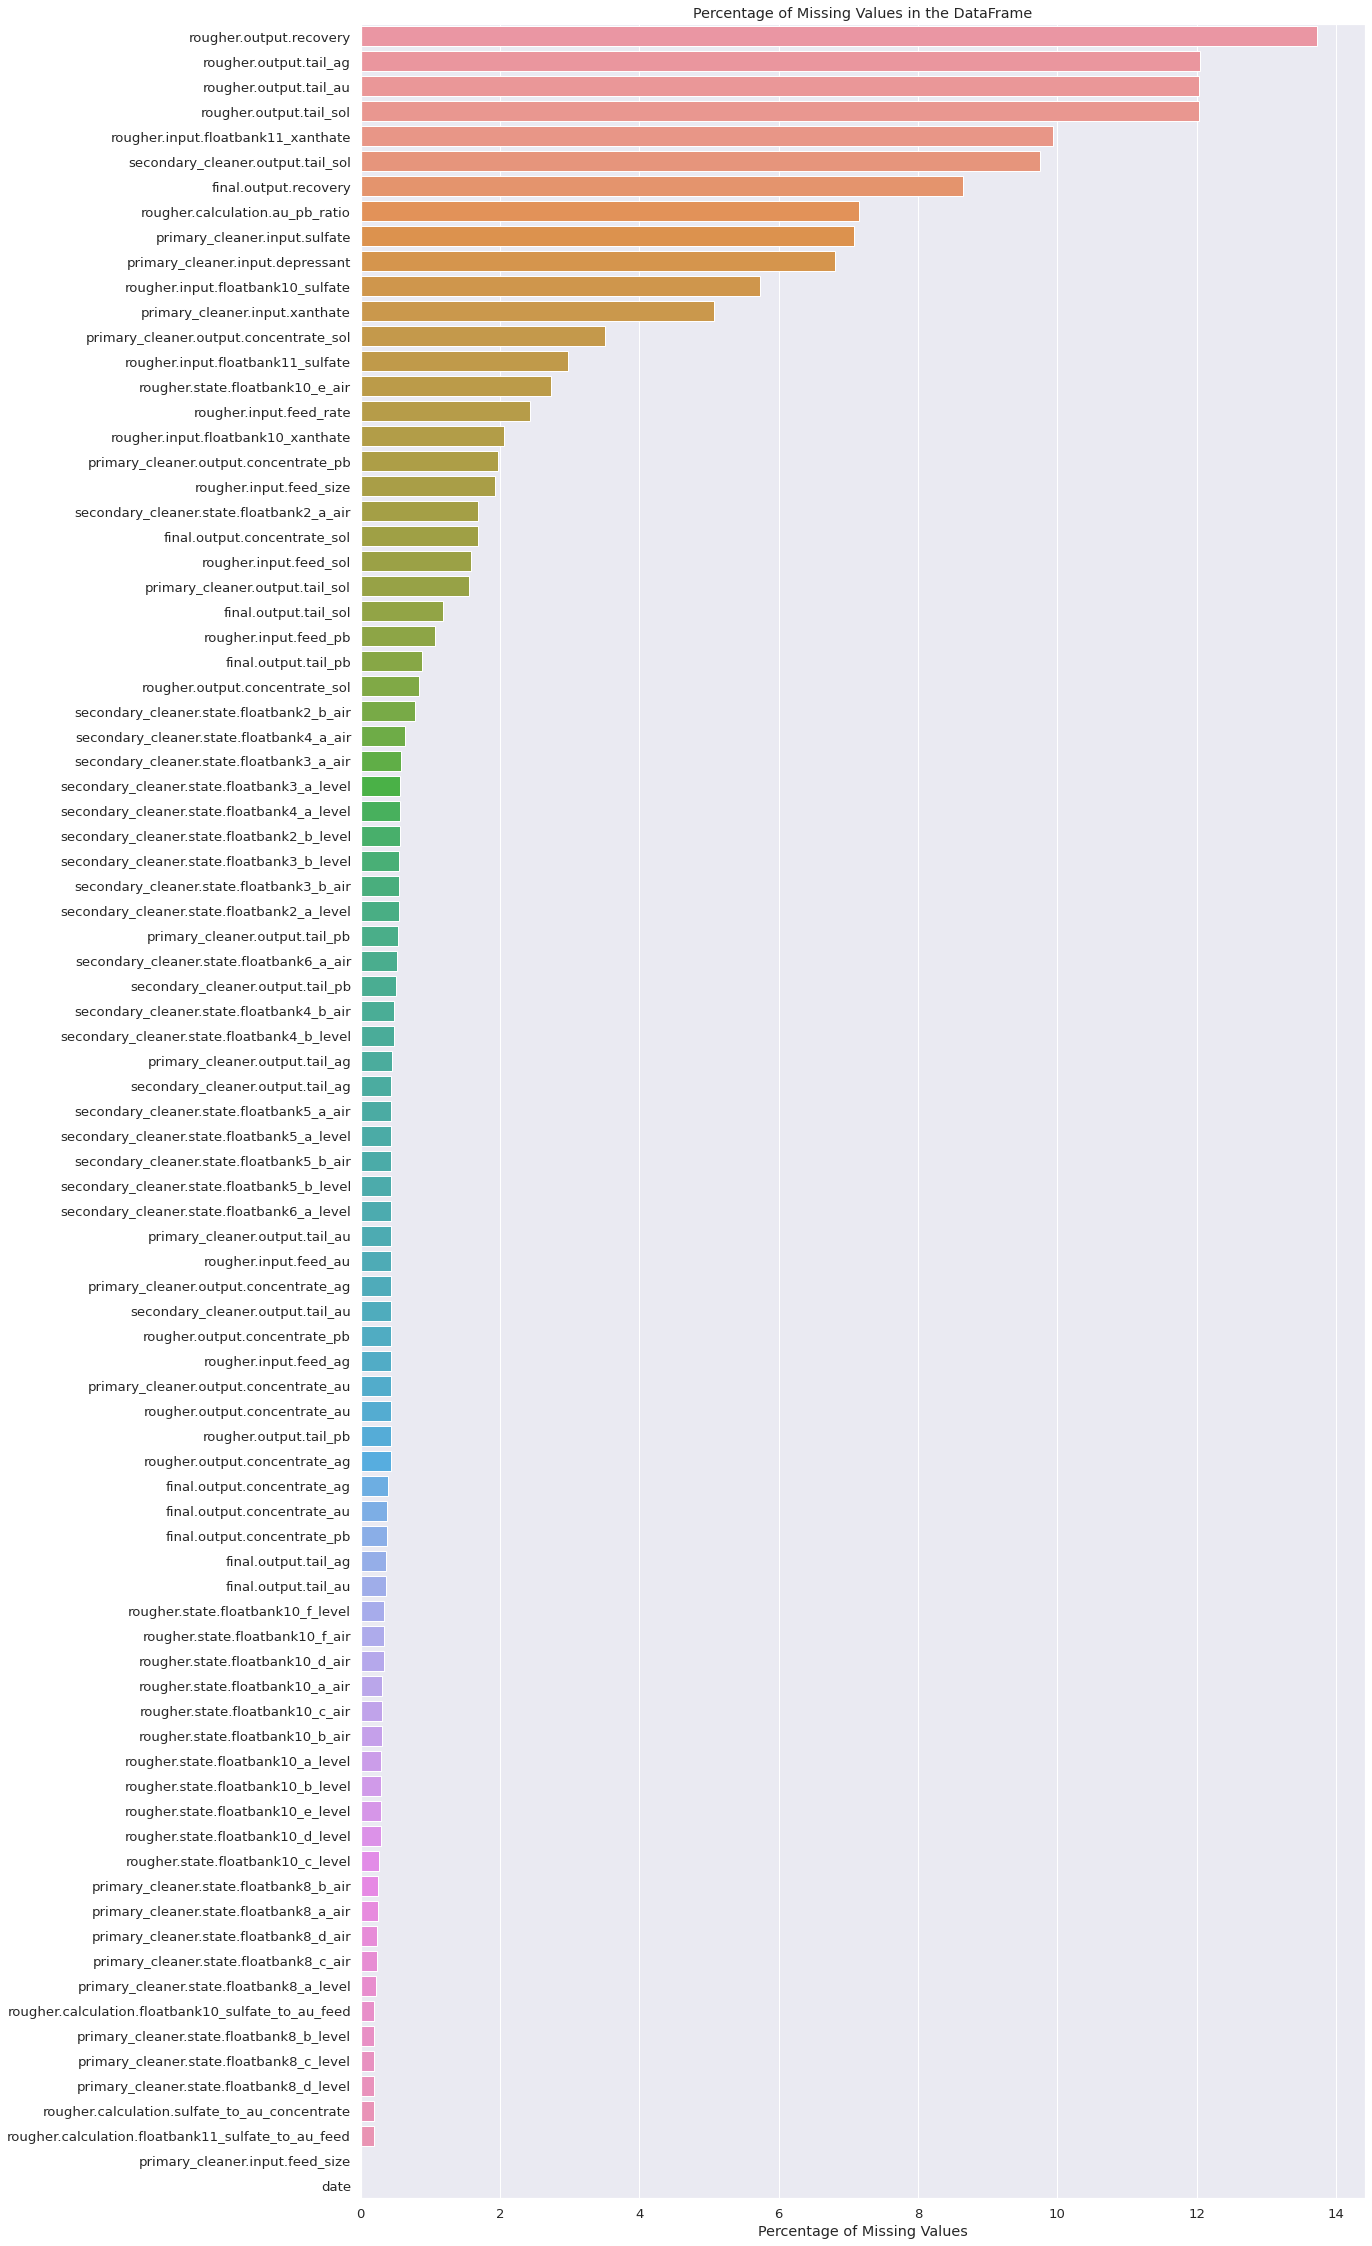

In [26]:
# Create a list of the DataFrames
list_of_df = [
    { 'name': 'Training Dataset',
      'data': df_train
    },
    { 'name': 'Test Dataset',
      'data': df_test
    },
    { 'name': 'Source Dataset',
      'data': df_source
    },
]
for item in list_of_df:
    get_missing_values_report_of_df(item['name'], item['data'])

Wow! Now, we have sufficient data on missing values in all the three DataFrames. So, we have to decide on how to fill in the missing values. Well, in the project description, it is given that - Data is indexed with the date and time of acquisition (date feature). Parameters that are next to each other in terms of time are often similar.
So, it means **we can forward fill the missing values (but not for missing targets)**. Let's create a function to do that first:

In [27]:
# Function to forward fill the missing values in the given DataFrame 
target_cols_to_avoid = ['rougher.output.recovery', 'final.output.recovery']

def forward_fill_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    for col in df:
        if col not in target_cols_to_avoid:
            df[col].fillna(method='ffill', axis=0, inplace=True)

Let's forward fill the missing values in all the Dataframes:

In [28]:
# Forward fill the missing values
forward_fill_missing_values(df_train)
forward_fill_missing_values(df_test)
forward_fill_missing_values(df_source)

Great! But also, since we have not forward filled the target columns so that we can accurately estimate errors of our ML models, let's drop all the rows where our target columns have missing values in both training set - `df_train` and source set - `df_source`:

In [29]:
# Drop all the rows where our target columns have missing values in df_train
df_train = df_train.dropna(subset=['final.output.recovery', 'rougher.output.recovery'])

# Validate that we dont't have any missing values now in target columns in df_train
df_train[['final.output.recovery', 'rougher.output.recovery']].isna().sum()

final.output.recovery      0
rougher.output.recovery    0
dtype: int64

In [30]:
# Drop all the rows where our target columns have missing values in df_source
df_source = df_source.dropna(subset=['final.output.recovery', 'rougher.output.recovery'])

# Validate that we dont't have any missing values now in target columns in df_source
df_source[['final.output.recovery', 'rougher.output.recovery']].isna().sum()

final.output.recovery      0
rougher.output.recovery    0
dtype: int64

Great! Let's check for missing values again on the updated DataFrames. We should not get any misisng values now:

In [31]:
# Check for missing values again
for item in list_of_df:
    item['data'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16860 non-null  float64
 2   final.output.concentrate_pb                         16860 non-null  float64
 3   final.output.concentrate_sol                        16860 non-null  float64
 4   final.output.concentrate_au                         16860 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16860 non-null  float64
 7   final.output.tail_pb                                16860 non-null  float64
 8   final.output.tail_sol                               16860 non-null  float64


Great! We are good now. Let's proceed.

## Look for duplicates <a id='look-for-duplicates'></a>  
[Back to Contents](#contents)

Let's now look for any duplicates in all the DataFrames:

In [32]:
# Look for duplicates in df_train
df_train.duplicated().sum()

0

In [33]:
# Look for duplicates in df_test
df_test.duplicated().sum()

0

In [34]:
# Look for duplicates in df_source
df_source.duplicated().sum()

0

Woah! We don't have any duplicate rows in any of the DataFrames.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Alright!

</div>

## Check datatypes <a id='check-datatypes'></a>  
[Back to Contents](#contents)

As already noticed, we have a `date` column in all the three DataFrames but it is of `object` datatype. Let's convert it to - `datetime`:

In [35]:
# Convert date column from string to datetime
df_train['date'] = pd.to_datetime(df_train['date'])

# Print info about the DataFrame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14149 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14149 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         14149 non-null  float64       
 2   final.output.concentrate_pb                         14149 non-null  float64       
 3   final.output.concentrate_sol                        14149 non-null  float64       
 4   final.output.concentrate_au                         14149 non-null  float64       
 5   final.output.recovery                               14149 non-null  float64       
 6   final.output.tail_ag                                14149 non-null  float64       
 7   final.output.tail_pb                                14149 non-null  float64       
 8   final.

/tmp/ipykernel_244/1499390916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['date'] = pd.to_datetime(df_train['date'])


In [36]:
# Convert date column from string to datetime
df_test['date'] = pd.to_datetime(df_test['date'])

# Print info about the DataFrame
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5856 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5856 non-null   float64       
 2   primary_cleaner.input.depressant            5856 non-null   float64       
 3   primary_cleaner.input.feed_size             5856 non-null   float64       
 4   primary_cleaner.input.xanthate              5856 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64       
 9   primary_

In [37]:
# Convert date column from string to datetime
df_source['date'] = pd.to_datetime(df_source['date'])

# Print info about the DataFrame
df_source.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19439 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         19439 non-null  float64       
 2   final.output.concentrate_pb                         19439 non-null  float64       
 3   final.output.concentrate_sol                        19439 non-null  float64       
 4   final.output.concentrate_au                         19439 non-null  float64       
 5   final.output.recovery                               19439 non-null  float64       
 6   final.output.tail_ag                                19439 non-null  float64       
 7   final.output.tail_pb                                19439 non-null  float64       
 8   final.

/tmp/ipykernel_244/1075853927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_source['date'] = pd.to_datetime(df_source['date'])


Awesome, we have cleaned our datasets, filled in all the missing values and corrected the datatypes. We are good to go.

# 7. Data Analysis <a id='data-analysis'></a>  
[Back to Contents](#contents)

## Analyze how the concentrations of metals (`Au`, `Ag`, `Pb`) change depending on the purification stage <a id='concentrations-of-metals'></a>  
[Back to Contents](#contents)

Let's analyze how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage in `df_train`. To do so, what data do we have? 

- We have three metals - `Au`, `Ag`, `Pb` to analyze
- We have four possible values for stage - **rougher**, **primary_cleaner**, **secondary_cleaner** and **final**. We have look into their outputs, for these metal concentrates.
- If we look into our columns in `df_train`, we have columns or features for the output concentrates of metals for **rougher**, **primary_cleaner** and **final** stages:
    - `rougher.output.concentrate_au`
    - `rougher.output.concentrate_ag`
    - `rougher.output.concentrate_pb`
    - `primary_cleaner.output.concentrate_au`
    - `primary_cleaner.output.concentrate_ag`
    - `primary_cleaner.output.concentrate_pb`
    - `final.output.concentrate_au`
    - `final.output.concentrate_ag`
    - `final.output.concentrate_pb`
    
So, let's do a analysis for these three purification stages.

In [38]:
# Define constants
METALS = ['au', 'ag', 'pb']
STAGE_PARAMETERS = ['rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']
STAGE_COLOR_INDICATORS = ['crimson', 'royalblue', 'forestgreen']

# Function to plot distribution of concentrations of metals (Au, Ag, Pb) for each purifixtaion stage
def plot_distribution_of_metal_concentrations(df: pd.DataFrame):
    """
    This function:
    1. takes a DataFrame from which we will select the a smaller dataframe of required columns
    2. plots a histogram for each of the three metals to show their distribution for each purification stage
    """
    for metal in METALS:
        
        # Set the plot styles 
        sns.set(rc = {'figure.figsize':(14.0, 8.0)})
        sns.set(font_scale = 1.2)
    
        # Setup for overlay subplots
        fig, ax = plt.subplots()
        for stage, color in zip(STAGE_PARAMETERS, STAGE_COLOR_INDICATORS):
            sns.histplot(df[stage+'_'+metal], stat='density', kde=True, label=stage+'_'+metal, color=color, alpha=0.5, ax=ax)
        
        # Set the title, label and legend of the plot
        plt.title(f'Distribution of {metal} concentrations across purification stage')
        plt.xlabel(f'Concentration of {metal}')
        plt.legend();
        plt.show()

Since we have a function now, let's call it on our training dataset - `df_train` and source dataset - `df_source` (not on test dataset - `df_test` as it doesn't have all `output` features) and observe how does it varies:

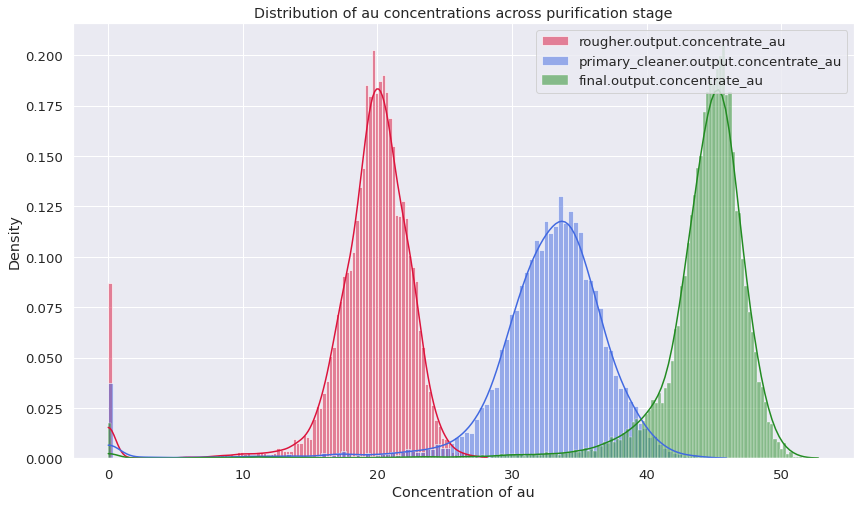

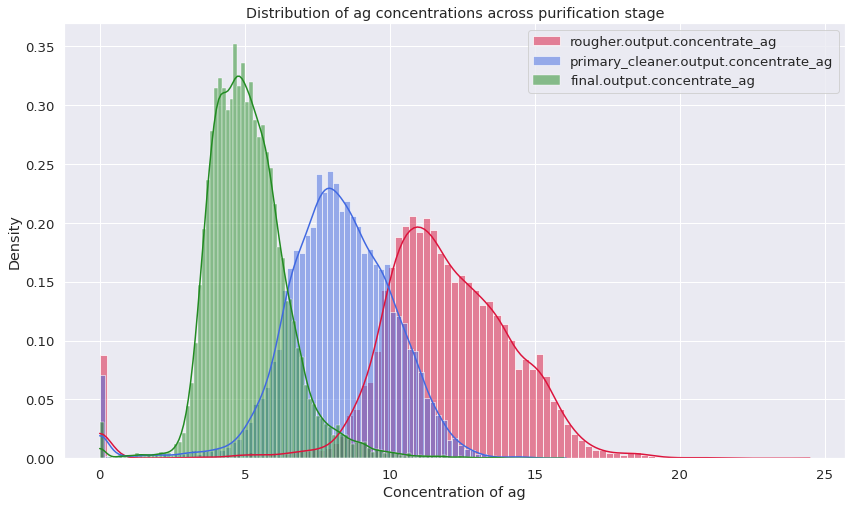

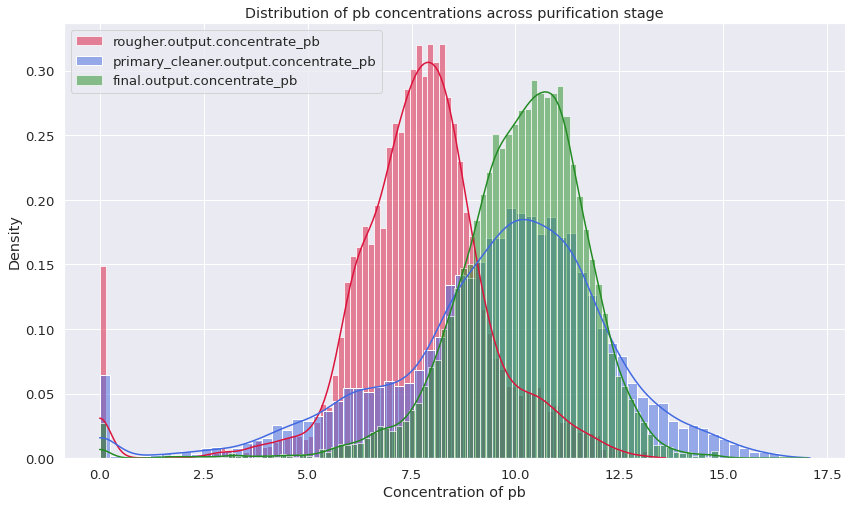

In [39]:
# Plot distribution of concentrations of metals (Au, Ag, Pb) for each purification stage for df_train
plot_distribution_of_metal_concentrations(df_train)

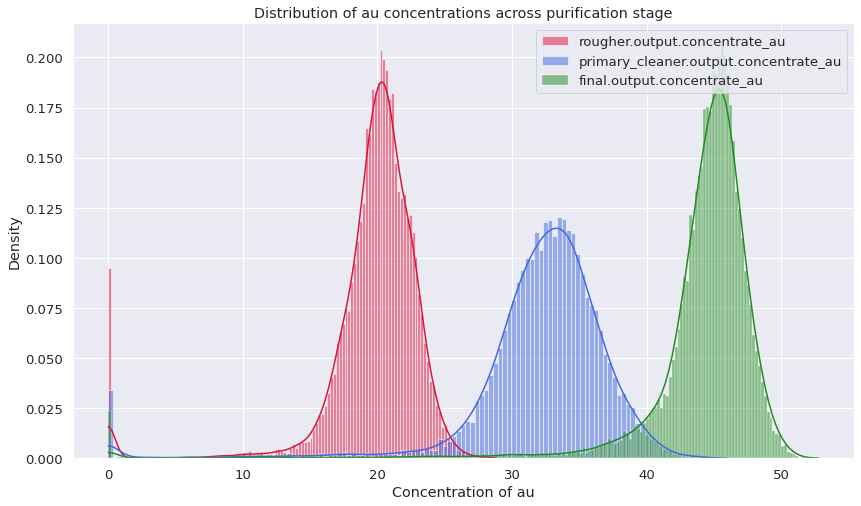

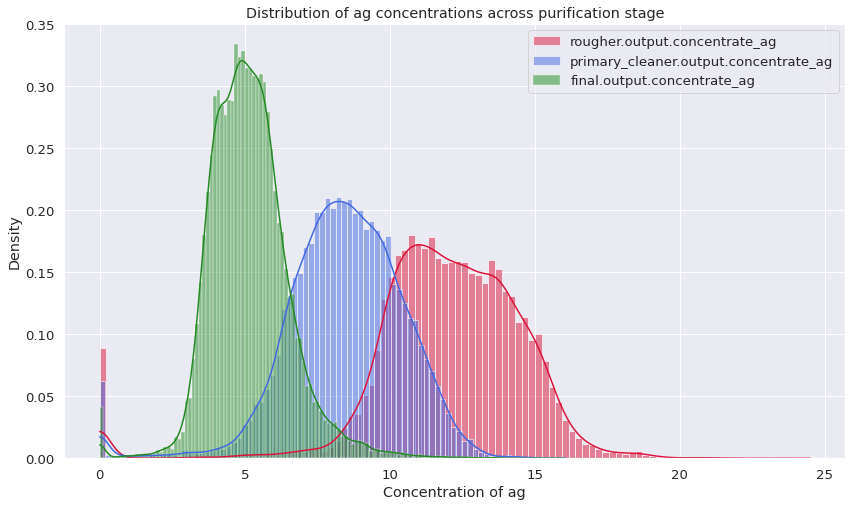

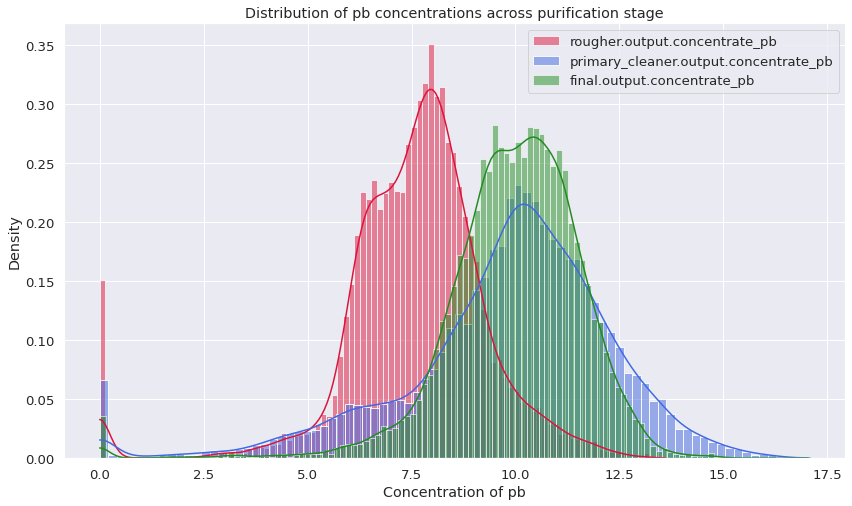

In [40]:
# Plot distribution of concentrations of metals (Au, Ag, Pb) for each purification stage for df_source
plot_distribution_of_metal_concentrations(df_source)

The above plots on both training dataset - `df_train` and source dataset - `df_source`, provide insights into the distribution of metal concentrations across different purification stages. Upon examining the plots, a notable observation emerges: **the concentration of gold (au) consistently rises from the initial `rougher.output stage` to the subsequent `final.output stage`.** This progression signifies the anticipated behavior of the process, indicating **effective purification and gold enrichment**.  

Conversely, the concentration trends for other metals exhibit distinct patterns. **Silver (ag) concentration notably declines as purification advances, indicative of successful removal**. Meanwhile, **the concentration of lead (pb) remains relatively constant throughout the stages, suggesting minimal alteration during the purification process**.

## Compare the feed particle size distributions in the training set and in the test set <a id='feed-particle-size-distributions'></a>  
[Back to Contents](#contents)

Let's **compare the feed particle size distributions in the training set - `df_train` and in the test set - `df_test`**. We need to check if the distributions vary significantly. If it is so, the ML models evaluation will be incorrect.  

Before getting into the process, let's identify the features in the training set - `df_train` and in the test set - `df_test` that corresponds to feed particle sizes. We have two such features in each dataset:
- `rougher.input.feed_size`  
- `primary_cleaner.input.feed_size`  

Great! So, let's write a function that creates a report to compare the feed particle size distribution between the two datasets:

In [41]:
# Function that creates a report to compare the input feed particle size distribution between the two datasets
def get_report_on_feed_particle_size(input_feed_type: str, input_feeds_from_both_dfs: list, labels: list, input_feed_color_indicators: list):
    # Calculate average input feed particle size for the training set
    train_avg_input_feed_particle_size = input_feeds_from_both_dfs[0].mean()
    
    # Calculate average input feed particle size for the test set
    test_avg_input_feed_particle_size = input_feeds_from_both_dfs[1].mean()
    
    # Prints the input feed particle size stats
    print('----------------------------------------------------------------------------')
    print(f'  {input_feed_type} Particle Size Stats for Training & Test Datasets')
    print('----------------------------------------------------------------------------')
    print(f'Average input feed particle size for Training Dataset is {train_avg_input_feed_particle_size}')
    print(f'Average input feed particle size for Test Dataset is {test_avg_input_feed_particle_size}')
    print()
    
    # Plot the input feed particle size distributions in the training set and in the test set 
    # Set the plot styles 
    sns.set(rc = {'figure.figsize':(16.0, 8.0)})
    sns.set(font_scale = 1.2)

    # Setup for overlay subplots
    fig, ax = plt.subplots()
    for input_feed_particle_sizes, color, label in zip(input_feeds_from_both_dfs, input_feed_color_indicators, labels):
        sns.histplot(input_feed_particle_sizes, stat='density', kde=True, label=label, color=color, alpha=0.5, ax=ax)

   # Set the title, label and legend of the plot
    plt.title(f'Distribution of input feed particle size for {input_feed_type} in the training set and in the test set')
    plt.xlabel(f'Input feed particle size')
    plt.legend();
    plt.show()

Let's first compare the rougher input feed particle size distribution between the two datasets using `rougher.input.feed_size`:

----------------------------------------------------------------------------
  rougher.input.feed_size Particle Size Stats for Training & Test Datasets
----------------------------------------------------------------------------
Average input feed particle size for Training Dataset is 61.247143621475374
Average input feed particle size for Test Dataset is 55.89886568885065



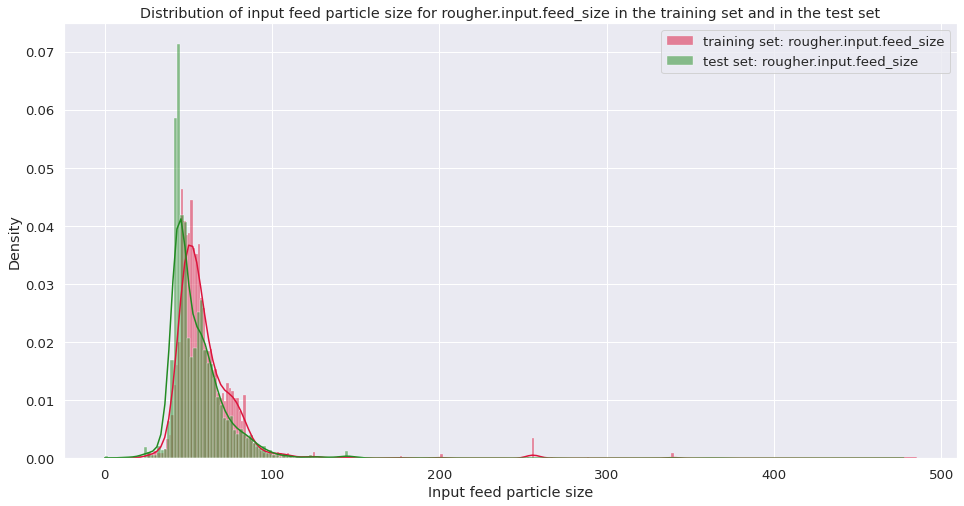

In [42]:
# Compare the rougher input feed particle size distribution between the two datasets
input_feeds_from_both_dfs = [df_train['rougher.input.feed_size'], df_test['rougher.input.feed_size']]
labels = ['training set: rougher.input.feed_size', 'test set: rougher.input.feed_size']
input_feed_color_indicators = ['crimson', 'forestgreen']

get_report_on_feed_particle_size('rougher.input.feed_size', input_feeds_from_both_dfs, labels, input_feed_color_indicators)


Now, let's compare the rougher input feed particle size distribution between the two datasets using `primary_cleaner.input.feed_size`:

----------------------------------------------------------------------------
  primary_cleaner.input.feed_size Particle Size Stats for Training & Test Datasets
----------------------------------------------------------------------------
Average input feed particle size for Training Dataset is 7.322309906901314
Average input feed particle size for Test Dataset is 7.2646512922454205



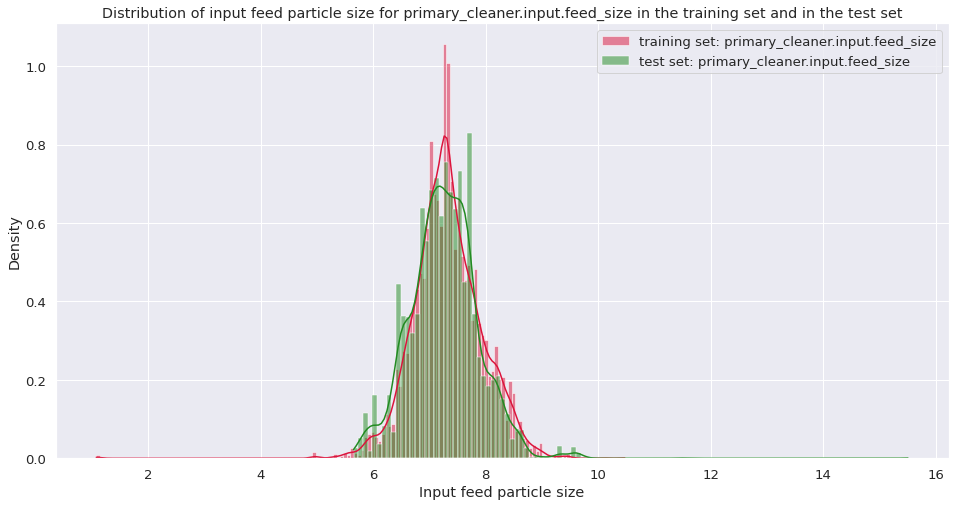

In [43]:
# Compare the primary_cleaner input feed particle size distribution between the two datasets
input_feeds_from_both_dfs = [df_train['primary_cleaner.input.feed_size'], df_test['primary_cleaner.input.feed_size']]
labels = ['training set: primary_cleaner.input.feed_size', 'test set: primary_cleaner.input.feed_size']
input_feed_color_indicators = ['crimson', 'forestgreen']

get_report_on_feed_particle_size('primary_cleaner.input.feed_size', input_feeds_from_both_dfs, labels, input_feed_color_indicators)


Well, **our observations indicate a remarkable similarity in the average particle sizes**. For example, the `rougher.input.feed_size` feature: the average particle size for the training set was 61.24, while for the test set it was 56. Similarly, for `primary_cleaner.input.feed_size`, the training set exhibited an average of 7.30, closely followed by the test set with an average of 7.26. Our plots too indicate the same.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Very good!

</div>

## Analyze the total concentrations of all substances at different stages <a id='total-concentrations-of-all-substances'></a>  
[Back to Contents](#contents)

Let's analyze the total concentrations of all substances at different stages in all the datasets: **raw feed**, **rougher concentrate**, and **final concentrate**. 

Before proceeding with the task, let's first list down the features that will give us concentrations of all substances at different stages:
- **Raw Feed**
    - `rougher.input.feed_ag`
    - `rougher.input.feed_pb`
    - `rougher.input.feed_sol`
    - `rougher.input.feed_au`
- **Rougher Concentrate**
    - `rougher.output.concentrate_ag`
    - `rougher.output.concentrate_pb`
    - `rougher.output.concentrate_sol`
    - `rougher.output.concentrate_au`
- **Final Concentrate**
    - `final.output.concentrate_ag`
    - `final.output.concentrate_pb`
    - `final.output.concentrate_sol`
    - `final.output.concentrate_au`

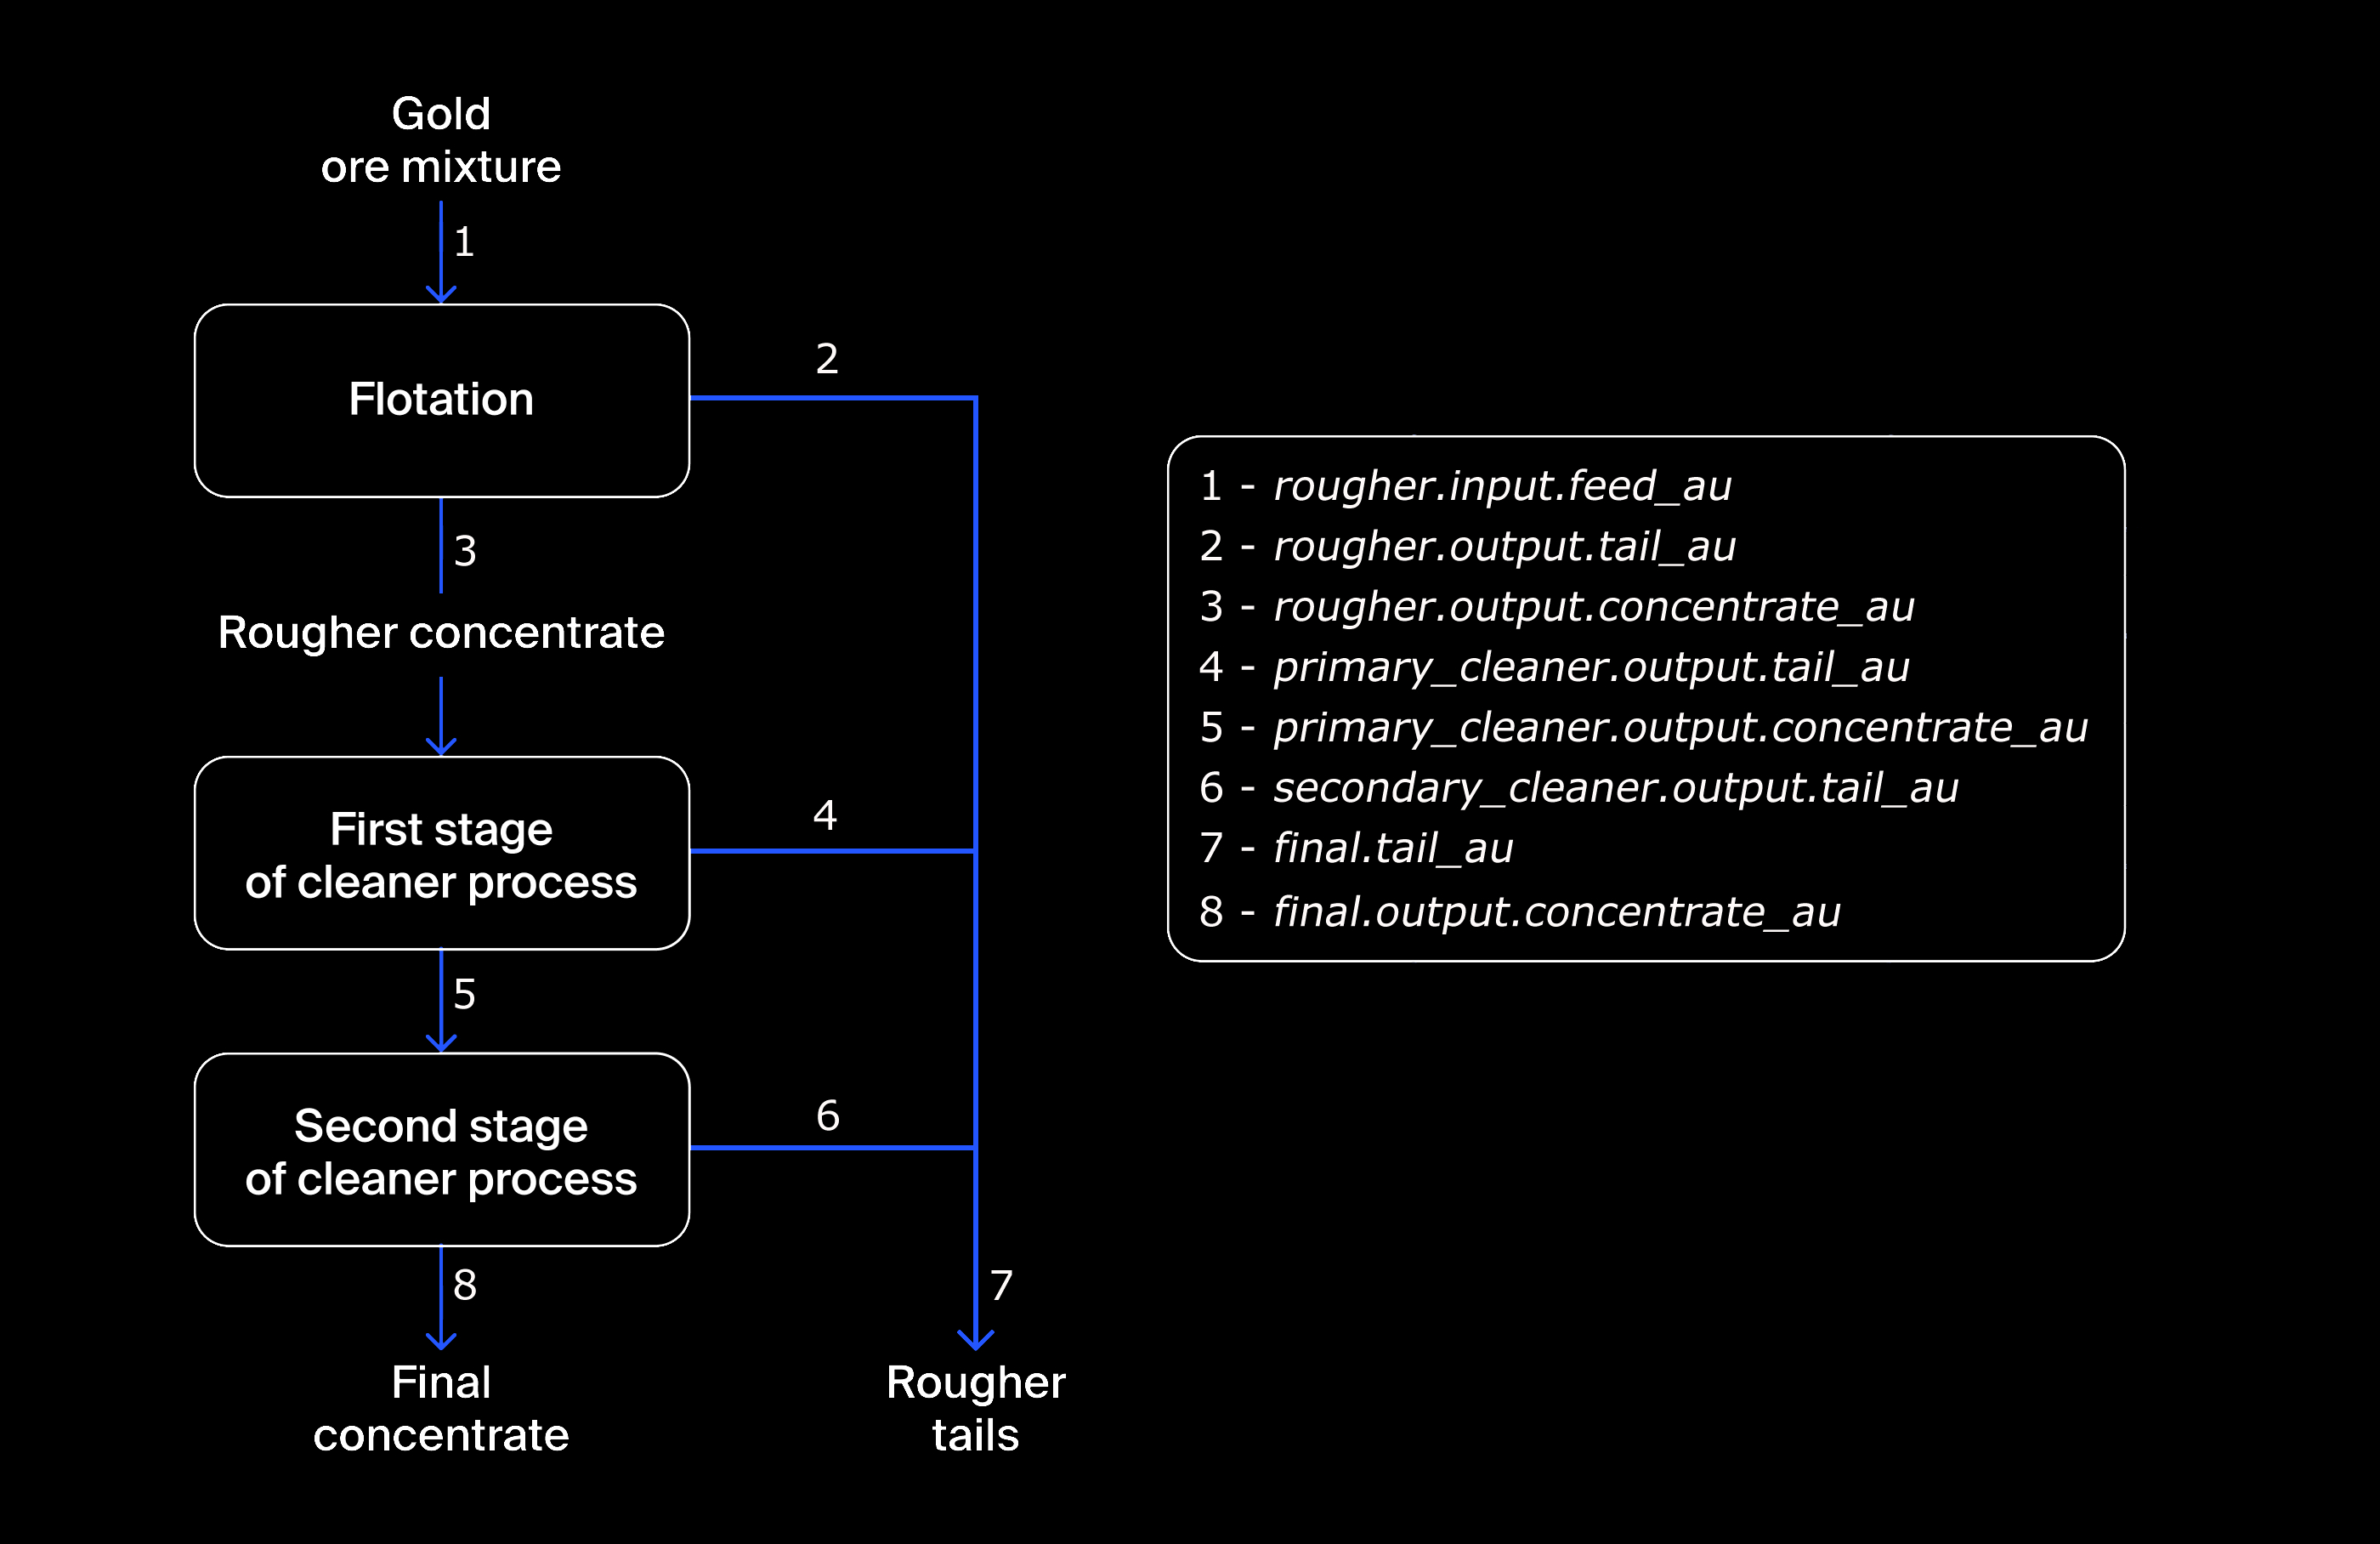

Let's **create a function that can calculate total concentrations of all substances at a particular stage in the given dataset** and plot the distribution so that we can analyze and discover any anomalies:

In [44]:
# Function to calculate total concentrations of all substances at a particular stage in the given dataset
# And plot the distribution
def calc_n_plot_total_concentrations(df: pd.DataFrame, stage: str, list_of_columns: list, color: str) -> pd.DataFrame:
    # Calculate total concentrations of all substances
    df[stage] = df[list_of_columns].sum(axis=1)
    
    # Plot the distributions in histogram
    # Set the plot styles 
    sns.set(rc = {'figure.figsize':(16.0, 8.0)})
    sns.set(font_scale = 1.2)

    sns.histplot(df[stage], bins=100, stat='frequency', kde=True, color=color)

    # Set the title, label and legend of the plot
    plt.title(f'Distribution of total concentrations of all substances at {stage}')
    plt.xlabel(stage)
    plt.show()
    
    # Plot the box plot to detect outliers
    # Customize the markers that show outliers in the data
    flierprops = dict(marker='o', markersize=10, markeredgecolor='black', markerfacecolor='darkgreen', alpha=0.6)

    # Customize the markers that show mean values
    meanprops = dict(marker='s', markerfacecolor='white', markeredgecolor='black')
    box_plot = sns.boxplot(
        data=df[stage],
        showmeans=True,
        orient='h',
        linewidth=2,
        flierprops=flierprops,
        meanprops=meanprops,
        palette='muted')
    
    box_plot.set(xlabel=stage,
            title=f'Distribution of total concentrations of all substances at {stage}')
    
    return df

### Training Dataset

Let's first analyze the distribution for the training dataset - `df_train` and look for anomalies and remove them if required.

#### Raw Feed Stage

/tmp/ipykernel_244/1277818888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[stage] = df[list_of_columns].sum(axis=1)


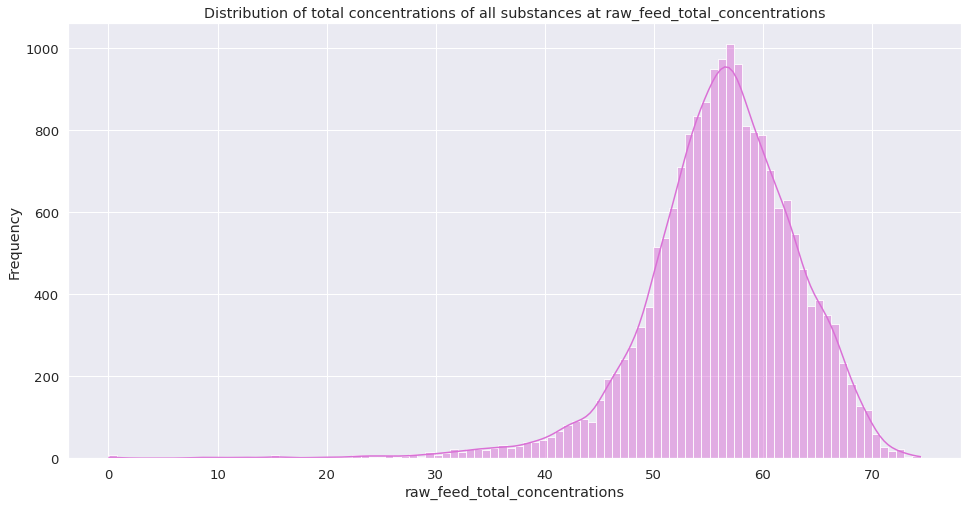

date  final.output.concentrate_ag  \
0 2016-01-15 00:00:00                     6.055403   
1 2016-01-15 01:00:00                     6.029369   
2 2016-01-15 02:00:00                     6.055926   
3 2016-01-15 03:00:00                     6.047977   
4 2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  \
0              0.895447              16.904297              2.143149   
1              0.927452              16.634514              2.224930   
2              0.953716              16.208849              2.257889   
3              0.883763              16.532835              2.146849   
4              0.792826              16.525686              2.055292   

   primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                     127.092003                         10.128295   
1                     125.629232                         10.296251   
2                     123.819808                         11.316280   
3                     122.270188                         11.322140   
4                     117.988169                         11.913613   

   primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                             7.25                        0.988759   
1                             7.25                        1.002663   
2                             7.25                        0.991265   
3                             7.25                        0.996739   
4                             7.25                        1.009869   

   primary_cleaner.output.concentrate_ag  \
0                               8.547551   
1                               8.558743   
2                               8.603505   
3                               7.221879   
4                               9.089428   

   primary_cleaner.output.concentrate_pb  \
0                              10.389648   
1                              10.497069   
2                              10.354494   
3                               8.496563   
4                               9.986786   

   primary_cleaner.output.concentrate_sol  \
0                               19.529297   
1                               19.369147   
2                               19.167579   
3                               15.978538   
4                               19.199864   

   primary_cleaner.output.concentrate_au  primary_cleaner.output.tail_ag  \
0                              34.174427                       14.936526   
1                              34.118526                       16.250511   
2                              33.969464                       16.491823   
3                              28.260743                       16.024359   
4                              33.044932                       16.480185   

   primary_cleaner.output.tail_pb  primary_cleaner.output.tail_sol  \
0                        2.534912                         7.476074   
1                        3.049646                         6.733907   
2                        3.124664                         6.471768   
3                  

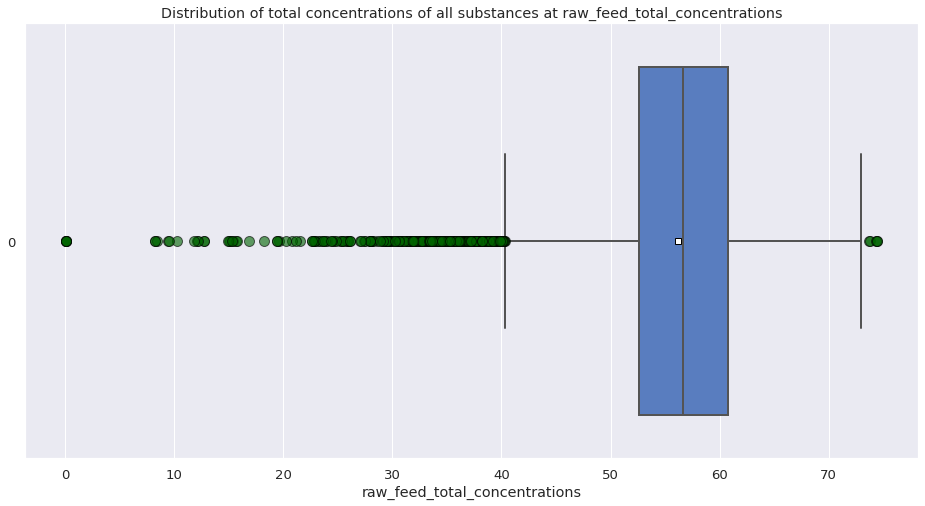

In [45]:
# Calculate total concentrations of all substances at Raw Feed stage in training dataset - df_train
list_of_columns = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au']
df_train = calc_n_plot_total_concentrations(df_train, 'raw_feed_total_concentrations', list_of_columns, 'orchid')

# Get the first five records of the dataset
df_train.head()

#### Rougher Concentrate Stage

/tmp/ipykernel_244/1277818888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[stage] = df[list_of_columns].sum(axis=1)


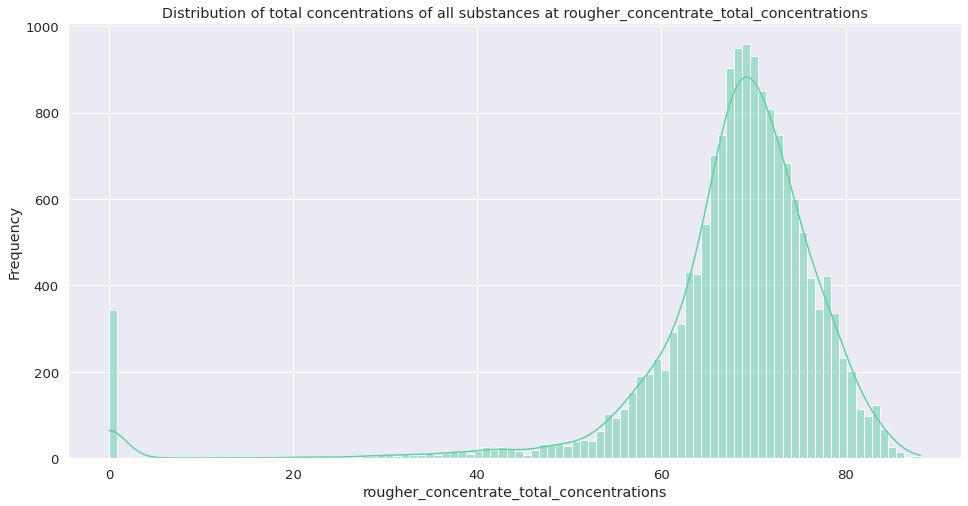

date  final.output.concentrate_ag  \
0 2016-01-15 00:00:00                     6.055403   
1 2016-01-15 01:00:00                     6.029369   
2 2016-01-15 02:00:00                     6.055926   
3 2016-01-15 03:00:00                     6.047977   
4 2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  \
0              0.895447              16.904297              2.143149   
1              0.927452              16.634514              2.224930   
2              0.953716              16.208849              2.257889   
3              0.883763              16.532835              2.146849   
4              0.792826              16.525686              2.055292   

   primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                     127.092003                         10.128295   
1                     125.629232                         10.296251   
2                     123.819808                         11.316280   
3                     122.270188                         11.322140   
4                     117.988169                         11.913613   

   primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                             7.25                        0.988759   
1                             7.25                        1.002663   
2                             7.25                        0.991265   
3                             7.25                        0.996739   
4                             7.25                        1.009869   

   primary_cleaner.output.concentrate_ag  \
0                               8.547551   
1                               8.558743   
2                               8.603505   
3                               7.221879   
4                               9.089428   

   primary_cleaner.output.concentrate_pb  \
0                              10.389648   
1                              10.497069   
2                              10.354494   
3                               8.496563   
4                               9.986786   

   primary_cleaner.output.concentrate_sol  \
0                               19.529297   
1                               19.369147   
2                               19.167579   
3                               15.978538   
4                               19.199864   

   primary_cleaner.output.concentrate_au  primary_cleaner.output.tail_ag  \
0                              34.174427                       14.936526   
1                              34.118526                       16.250511   
2                              33.969464                       16.491823   
3                              28.260743                       16.024359   
4                              33.044932                       16.480185   

   primary_cleaner.output.tail_pb  primary_cleaner.output.tail_sol  \
0                        2.534912                         7.476074   
1                        3.049646                         6.733907   
2                        3.124664                         6.471768   
3                  

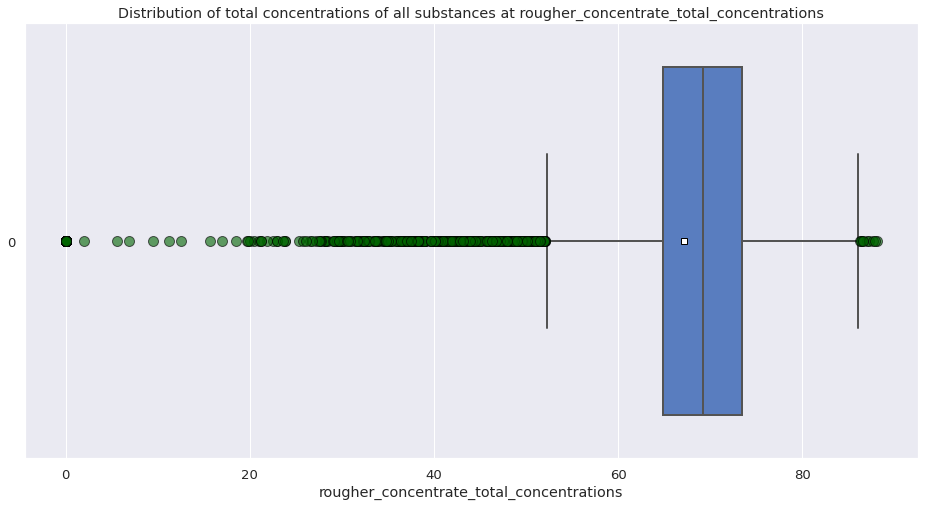

In [46]:
# Calculate total concentrations of all substances at Rougher Concentrate stage in training dataset - df_train
list_of_columns = ['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']
df_train = calc_n_plot_total_concentrations(df_train, 'rougher_concentrate_total_concentrations', list_of_columns, 'mediumaquamarine')

# Get the first five records of the dataset
df_train.head()

#### Final Concentrate Stage

/tmp/ipykernel_244/1277818888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[stage] = df[list_of_columns].sum(axis=1)


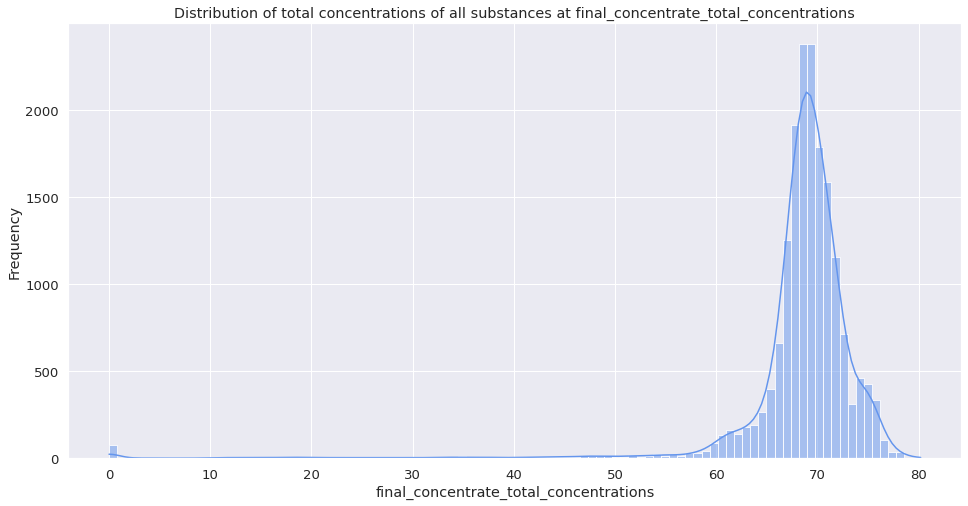

date  final.output.concentrate_ag  \
0 2016-01-15 00:00:00                     6.055403   
1 2016-01-15 01:00:00                     6.029369   
2 2016-01-15 02:00:00                     6.055926   
3 2016-01-15 03:00:00                     6.047977   
4 2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  \
0              0.895447              16.904297              2.143149   
1              0.927452              16.634514              2.224930   
2              0.953716              16.208849              2.257889   
3              0.883763              16.532835              2.146849   
4              0.792826              16.525686              2.055292   

   primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                     127.092003                         10.128295   
1                     125.629232                         10.296251   
2                     123.819808                         11.316280   
3                     122.270188                         11.322140   
4                     117.988169                         11.913613   

   primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                             7.25                        0.988759   
1                             7.25                        1.002663   
2                             7.25                        0.991265   
3                             7.25                        0.996739   
4                             7.25                        1.009869   

   primary_cleaner.output.concentrate_ag  \
0                               8.547551   
1                               8.558743   
2                               8.603505   
3                               7.221879   
4                               9.089428   

   primary_cleaner.output.concentrate_pb  \
0                              10.389648   
1                              10.497069   
2                              10.354494   
3                               8.496563   
4                               9.986786   

   primary_cleaner.output.concentrate_sol  \
0                               19.529297   
1                               19.369147   
2                               19.167579   
3                               15.978538   
4                               19.199864   

   primary_cleaner.output.concentrate_au  primary_cleaner.output.tail_ag  \
0                              34.174427                       14.936526   
1                              34.118526                       16.250511   
2                              33.969464                       16.491823   
3                              28.260743                       16.024359   
4                              33.044932                       16.480185   

   primary_cleaner.output.tail_pb  primary_cleaner.output.tail_sol  \
0                        2.534912                         7.476074   
1                        3.049646                         6.733907   
2                        3.124664                         6.471768   
3                  

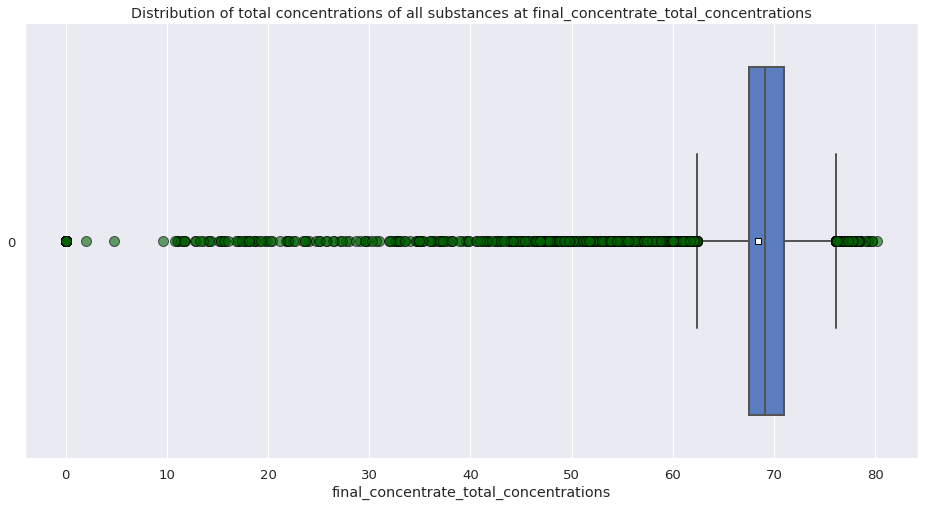

In [47]:
# Calculate total concentrations of all substances at Final Concentrate stage in training dataset - df_train
list_of_columns = ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au']
df_train = calc_n_plot_total_concentrations(df_train, 'final_concentrate_total_concentrations', list_of_columns, 'cornflowerblue')

# Get the first five records of the dataset
df_train.head()

#### Conclusion

**Raw Feed Stage**
- The total concentrations of all substances in the training set - `df_train` is calculated in a new feature - `raw_feed_total_concentrations`.
- The total concentrations of all substances in the training set is **Left-Skewed** as the peak of the distribution is on the right side and the mean is less than the median.
- There are many outliers but there is an unusaul large spike in concentration of all substances at `0`. That's doesn't sound right.
- We will remove all the observations in the training set - `df_train` where `df_train['raw_feed_total_concentrations'] < 0.8`

**Rougher Concentrate Stage**
- The total concentrations of all substances in the training set - `df_train` is calculated in a new feature - `rougher_concentrate_total_concentrations`.
- The total concentrations of all substances in the training set is **Left-Skewed** as the peak of the distribution is on the right side and the mean is less than the median.
- There are many outliers but there is an unusaul large spike in concentration of all substances at `0`. That's doesn't sound right.
- We will remove all the observations in the training set - `df_train` where `df_train['rougher_concentrate_total_concentrations'] < 0.8`

**Final Concentrate Stage**
- The total concentrations of all substances in the training set - `df_train` is calculated in a new feature - `final_concentrate_total_concentrations`.
- The total concentrations of all substances in the training set is **Left-Skewed** as the peak of the distribution is on the right side and the mean is less than the median.
- There are many outliers but there is an unusaul large spike in concentration of all substances at `0`. That's doesn't sound right.
- We will remove all the observations in the training set - `df_train` where `df_train['final_concentrate_total_concentrations'] < 0.8`

#### Remove the anomalies

According to the conclusions above, let's filter the observations from the training set - `df_train`:

In [48]:
# Filter the training set of all the anomalies detected in the conclusion above
df_train = df_train[(df_train['raw_feed_total_concentrations'] >= 0.8) & (df_train['rougher_concentrate_total_concentrations'] >= 0.8) & (df_train['final_concentrate_total_concentrations'] >= 0.8)]

# Get the shape of the updated dataset
df_train.shape

(13789, 90)

### Source Dataset

Let's now analyze the distribution for the source dataset - `df_source` and look for anomalies and remove them if required.

#### Raw Feed Stage

/tmp/ipykernel_244/1277818888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[stage] = df[list_of_columns].sum(axis=1)


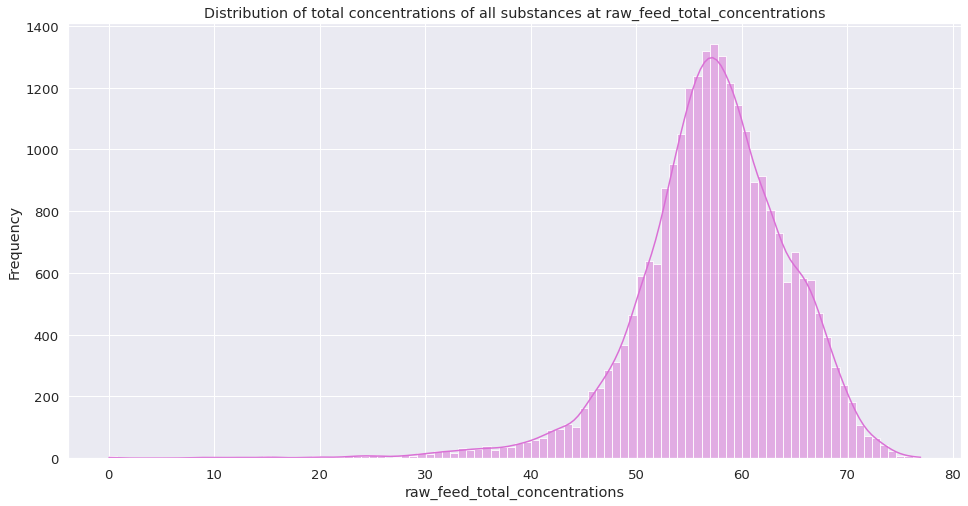

date  final.output.concentrate_ag  \
0 2016-01-15 00:00:00                     6.055403   
1 2016-01-15 01:00:00                     6.029369   
2 2016-01-15 02:00:00                     6.055926   
3 2016-01-15 03:00:00                     6.047977   
4 2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  \
0              0.895447              16.904297              2.143149   
1              0.927452              16.634514              2.224930   
2              0.953716              16.208849              2.257889   
3              0.883763              16.532835              2.146849   
4              0.792826              16.525686              2.055292   

   primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                     127.092003                         10.128295   
1                     125.629232                         10.296251   
2                     123.819808                         11.316280   
3                     122.270188                         11.322140   
4                     117.988169                         11.913613   

   primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                             7.25                        0.988759   
1                             7.25                        1.002663   
2                             7.25                        0.991265   
3                             7.25                        0.996739   
4                             7.25                        1.009869   

   primary_cleaner.output.concentrate_ag  \
0                               8.547551   
1                               8.558743   
2                               8.603505   
3                               7.221879   
4                               9.089428   

   primary_cleaner.output.concentrate_pb  \
0                              10.389648   
1                              10.497069   
2                              10.354494   
3                               8.496563   
4                               9.986786   

   primary_cleaner.output.concentrate_sol  \
0                               19.529297   
1                               19.369147   
2                               19.167579   
3                               15.978538   
4                               19.199864   

   primary_cleaner.output.concentrate_au  primary_cleaner.output.tail_ag  \
0                              34.174427                       14.936526   
1                              34.118526                       16.250511   
2                              33.969464                       16.491823   
3                              28.260743                       16.024359   
4                              33.044932                       16.480185   

   primary_cleaner.output.tail_pb  primary_cleaner.output.tail_sol  \
0                        2.534912                         7.476074   
1                        3.049646                         6.733907   
2                        3.124664                         6.471768   
3                  

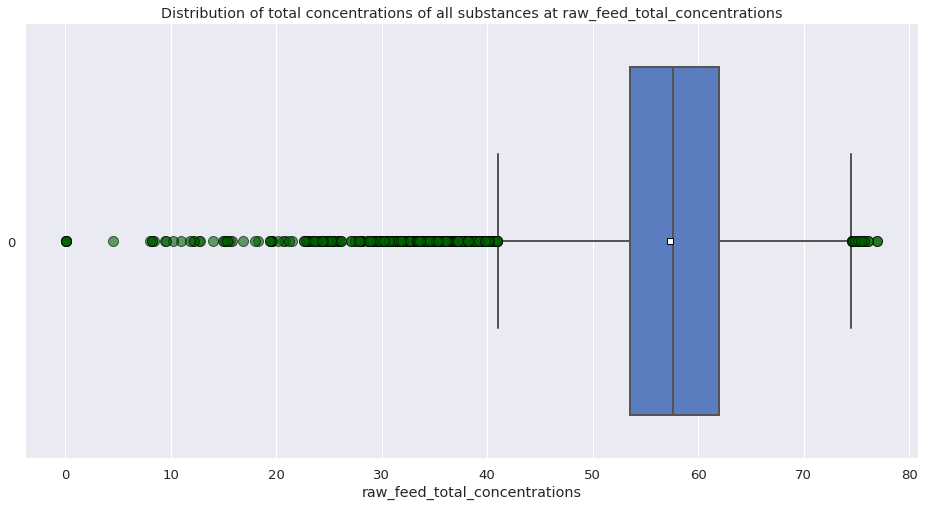

In [49]:
# Calculate total concentrations of all substances at Raw Feed stage in source dataset - df_source
list_of_columns = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au']
df_source = calc_n_plot_total_concentrations(df_source, 'raw_feed_total_concentrations', list_of_columns, 'orchid')

# Get the first five records of the dataset
df_source.head()

#### Rougher Concentrate Stage

/tmp/ipykernel_244/1277818888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[stage] = df[list_of_columns].sum(axis=1)


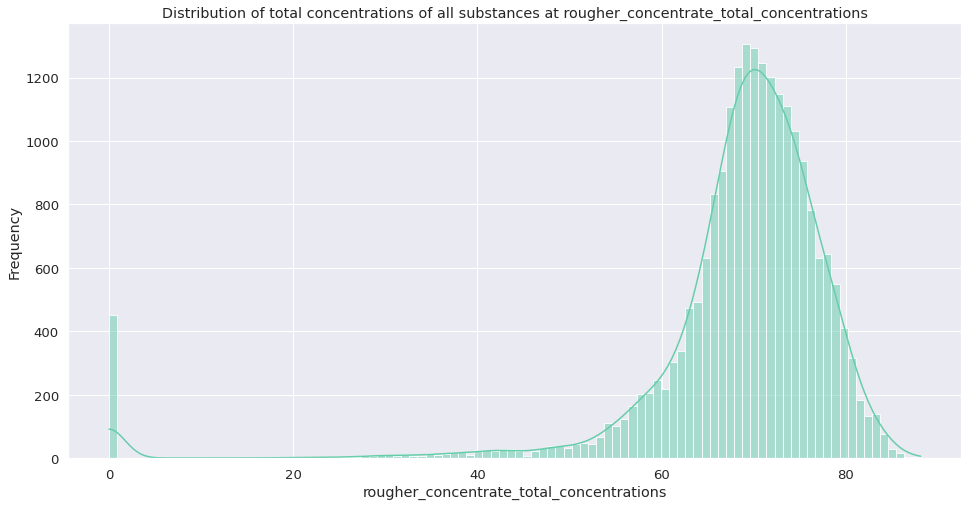

date  final.output.concentrate_ag  \
0 2016-01-15 00:00:00                     6.055403   
1 2016-01-15 01:00:00                     6.029369   
2 2016-01-15 02:00:00                     6.055926   
3 2016-01-15 03:00:00                     6.047977   
4 2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  \
0              0.895447              16.904297              2.143149   
1              0.927452              16.634514              2.224930   
2              0.953716              16.208849              2.257889   
3              0.883763              16.532835              2.146849   
4              0.792826              16.525686              2.055292   

   primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                     127.092003                         10.128295   
1                     125.629232                         10.296251   
2                     123.819808                         11.316280   
3                     122.270188                         11.322140   
4                     117.988169                         11.913613   

   primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                             7.25                        0.988759   
1                             7.25                        1.002663   
2                             7.25                        0.991265   
3                             7.25                        0.996739   
4                             7.25                        1.009869   

   primary_cleaner.output.concentrate_ag  \
0                               8.547551   
1                               8.558743   
2                               8.603505   
3                               7.221879   
4                               9.089428   

   primary_cleaner.output.concentrate_pb  \
0                              10.389648   
1                              10.497069   
2                              10.354494   
3                               8.496563   
4                               9.986786   

   primary_cleaner.output.concentrate_sol  \
0                               19.529297   
1                               19.369147   
2                               19.167579   
3                               15.978538   
4                               19.199864   

   primary_cleaner.output.concentrate_au  primary_cleaner.output.tail_ag  \
0                              34.174427                       14.936526   
1                              34.118526                       16.250511   
2                              33.969464                       16.491823   
3                              28.260743                       16.024359   
4                              33.044932                       16.480185   

   primary_cleaner.output.tail_pb  primary_cleaner.output.tail_sol  \
0                        2.534912                         7.476074   
1                        3.049646                         6.733907   
2                        3.124664                         6.471768   
3                  

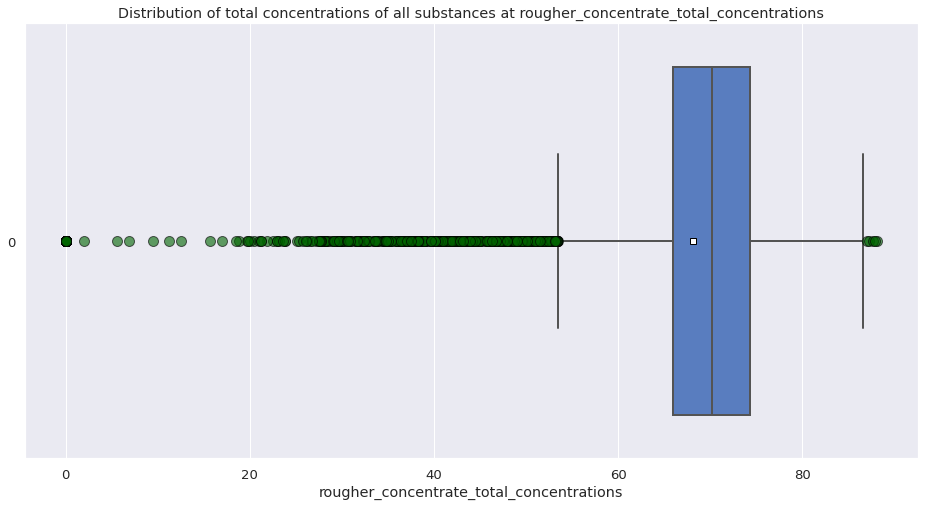

In [50]:
# Calculate total concentrations of all substances at Rougher Concentrate stage in source dataset - df_source
list_of_columns = ['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']
df_source = calc_n_plot_total_concentrations(df_source, 'rougher_concentrate_total_concentrations', list_of_columns, 'mediumaquamarine')

# Get the first five records of the dataset
df_source.head()

#### Final Concentrate Stage

/tmp/ipykernel_244/1277818888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[stage] = df[list_of_columns].sum(axis=1)


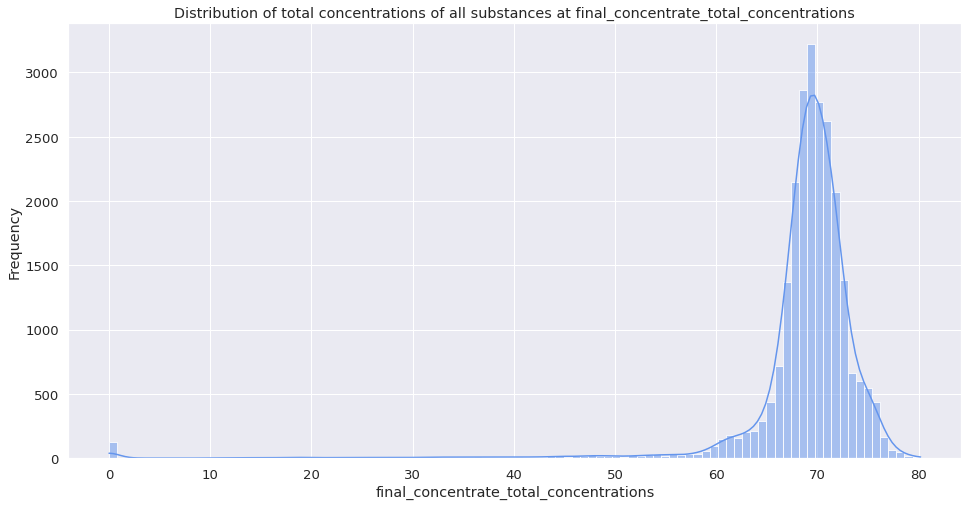

date  final.output.concentrate_ag  \
0 2016-01-15 00:00:00                     6.055403   
1 2016-01-15 01:00:00                     6.029369   
2 2016-01-15 02:00:00                     6.055926   
3 2016-01-15 03:00:00                     6.047977   
4 2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  \
0              0.895447              16.904297              2.143149   
1              0.927452              16.634514              2.224930   
2              0.953716              16.208849              2.257889   
3              0.883763              16.532835              2.146849   
4              0.792826              16.525686              2.055292   

   primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                     127.092003                         10.128295   
1                     125.629232                         10.296251   
2                     123.819808                         11.316280   
3                     122.270188                         11.322140   
4                     117.988169                         11.913613   

   primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                             7.25                        0.988759   
1                             7.25                        1.002663   
2                             7.25                        0.991265   
3                             7.25                        0.996739   
4                             7.25                        1.009869   

   primary_cleaner.output.concentrate_ag  \
0                               8.547551   
1                               8.558743   
2                               8.603505   
3                               7.221879   
4                               9.089428   

   primary_cleaner.output.concentrate_pb  \
0                              10.389648   
1                              10.497069   
2                              10.354494   
3                               8.496563   
4                               9.986786   

   primary_cleaner.output.concentrate_sol  \
0                               19.529297   
1                               19.369147   
2                               19.167579   
3                               15.978538   
4                               19.199864   

   primary_cleaner.output.concentrate_au  primary_cleaner.output.tail_ag  \
0                              34.174427                       14.936526   
1                              34.118526                       16.250511   
2                              33.969464                       16.491823   
3                              28.260743                       16.024359   
4                              33.044932                       16.480185   

   primary_cleaner.output.tail_pb  primary_cleaner.output.tail_sol  \
0                        2.534912                         7.476074   
1                        3.049646                         6.733907   
2                        3.124664                         6.471768   
3                  

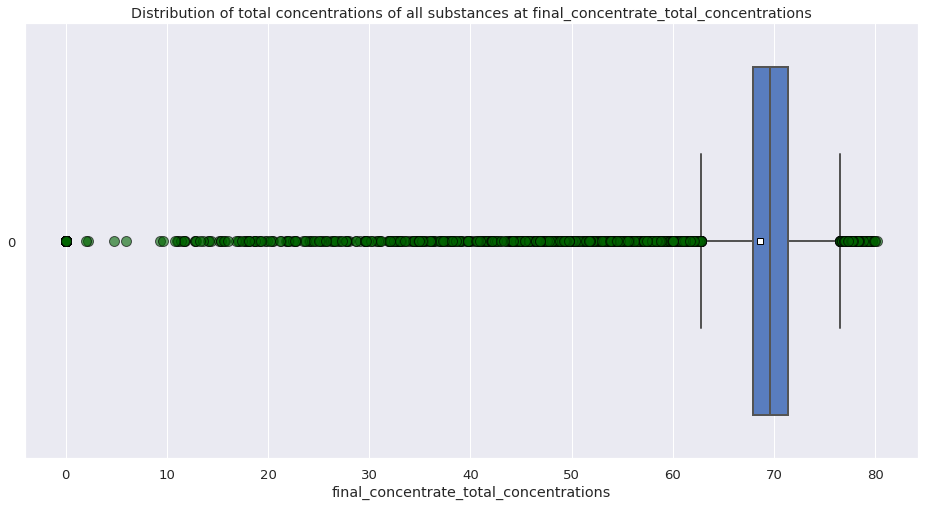

In [51]:
# Calculate total concentrations of all substances at Final Concentrate stage in source dataset - df_source
list_of_columns = ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au']
df_source = calc_n_plot_total_concentrations(df_source, 'final_concentrate_total_concentrations', list_of_columns, 'cornflowerblue')

# Get the first five records of the dataset
df_source.head()

#### Conclusion

**Raw Feed Stage**
- The total concentrations of all substances in the source set - `df_source` is calculated in a new feature - `raw_feed_total_concentrations`.
- The total concentrations of all substances in the source set is **Left-Skewed** as the peak of the distribution is on the right side and the mean is less than the median.
- There are many outliers but there is an unusaul large spike in concentration of all substances at `0`. That's doesn't sound right.
- We will remove all the observations in the source set - `df_source` where `df_source['raw_feed_total_concentrations'] < 0.8`

**Rougher Concentrate Stage**
- The total concentrations of all substances in the source set - `df_source` is calculated in a new feature - `rougher_concentrate_total_concentrations`.
- The total concentrations of all substances in the source set is **Left-Skewed** as the peak of the distribution is on the right side and the mean is less than the median.
- There are many outliers but there is an unusaul large spike in concentration of all substances at `0`. That's doesn't sound right.
- We will remove all the observations in the source set - `df_source` where `df_source['rougher_concentrate_total_concentrations'] < 0.8`

**Final Concentrate Stage**
- The total concentrations of all substances in the source set - `df_source` is calculated in a new feature - `final_concentrate_total_concentrations`.
- The total concentrations of all substances in the source set is **Left-Skewed** as the peak of the distribution is on the right side and the mean is less than the median.
- There are many outliers but there is an unusaul large spike in concentration of all substances at `0`. That's doesn't sound right.
- We will remove all the observations in the source set - `df_source` where `df_source['final_concentrate_total_concentrations'] < 0.8`

#### Remove the anomalies

According to the conclusions above, let's filter the observations from the source set - `df_source`:

In [52]:
# Filter the source set of all the anomalies detected in the conclusion above
df_source = df_source[(df_source['raw_feed_total_concentrations'] >= 0.8) & (df_source['rougher_concentrate_total_concentrations'] >= 0.8) & (df_source['final_concentrate_total_concentrations'] >= 0.8)]

# Get the shape of the updated dataset
df_source.shape

(18943, 90)

### Test Dataset

Since, the test dataset - `df_test` doesn't have all the `output` features, we have only the below columns that comes **Raw Feed** stage:
- `rougher.input.feed_ag`
- `rougher.input.feed_pb`
- `rougher.input.feed_sol`
- `rougher.input.feed_au`

We can analyze the total concentrations of all substances in the test set - `df_test` for the **Raw Feed** stage alone and find and remove any anomalies.

#### Raw Feed Stage

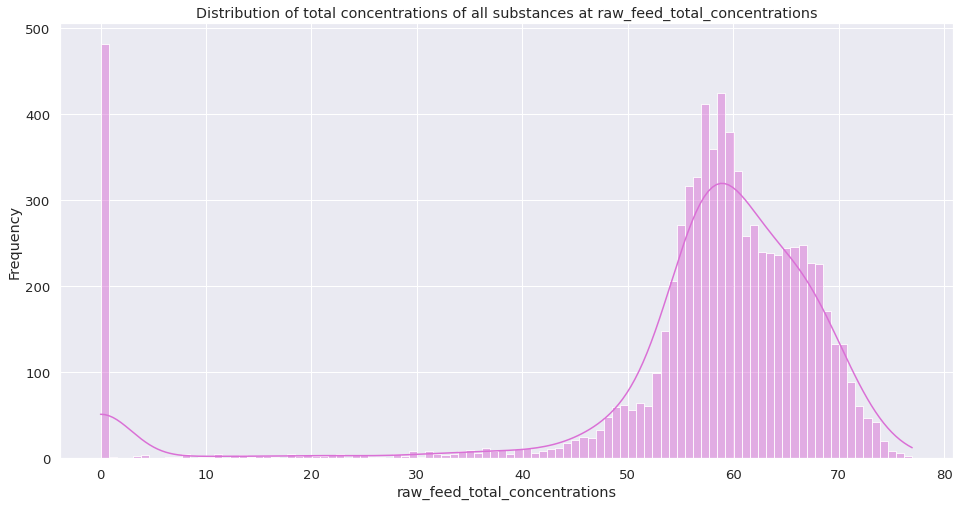

date  primary_cleaner.input.sulfate  \
0 2016-09-01 00:59:59                     210.800909   
1 2016-09-01 01:59:59                     215.392455   
2 2016-09-01 02:59:59                     215.259946   
3 2016-09-01 03:59:59                     215.336236   
4 2016-09-01 04:59:59                     199.099327   

   primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                         14.993118                         8.080000   
1                         14.987471                         8.080000   
2                         12.884934                         7.786667   
3                         12.006805                         7.640000   
4                         10.682530                         7.530000   

   primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                        1.005021                             1398.981301   
1                        0.990469                             1398.777912   
2                        0.996043                             1398.493666   
3                        0.863514                             1399.618111   
4                        0.805575                             1401.268123   

   primary_cleaner.state.floatbank8_a_level  \
0                               -500.225577   
1                               -500.057435   
2                               -500.868360   
3                               -498.863574   
4                               -500.808305   

   primary_cleaner.state.floatbank8_b_air  \
0                             1399.144926   
1                             1398.055362   
2                             1398.860436   
3                             1397.440120   
4                             1398.128818   

   primary_cleaner.state.floatbank8_b_level  \
0                               -499.919735   
1                               -499.778182   
2                               -499.764529   
3                               -499.211024   
4                               -499.504543   

   primary_cleaner.state.floatbank8_c_air  \
0                             1400.102998   
1                             1396.151033   
2                             1398.075709   
3                             1400.129303   
4                             1402.172226   

   primary_cleaner.state.floatbank8_c_level  \
0                               -500.704369   
1                               -499.240168   
2                               -502.151509   
3                               -498.355873   
4                               -500.810606   

   primary_cleaner.state.floatbank8_d_air  \
0                             1399.001695   
1                             1399.508091   
2                             1399.497088   
3                             1401.065165   
4                             1399.480508   

   primary_cleaner.state.floatbank8_d_level  rougher.input.feed_ag  \
0                               -499.485144              13.128569   
1                               -500.416324              13.036280   
2                               -499.715479              13.138412   
3                               -501.038738              12.400507   
4                               -499.374053              11.327427   

   rougher.input.feed_pb  rougher.input.feed_rate  rougher.input.feed_size  \
0               5.636710               489.793655                62.710452   
1               5.526065               490.104534                61.961163   
2               5.426561               489.617969                66.903807   
3               5.114758               476.618130                59.865919   
4               4.767383               488.248117                63.315324   

   rougher.input.feed_sol  rougher.input.feed_au  \
0               42.022440              12.084103   
1               41.187903              11.918977   
2               42.546294              12.091332   
3               41.06019

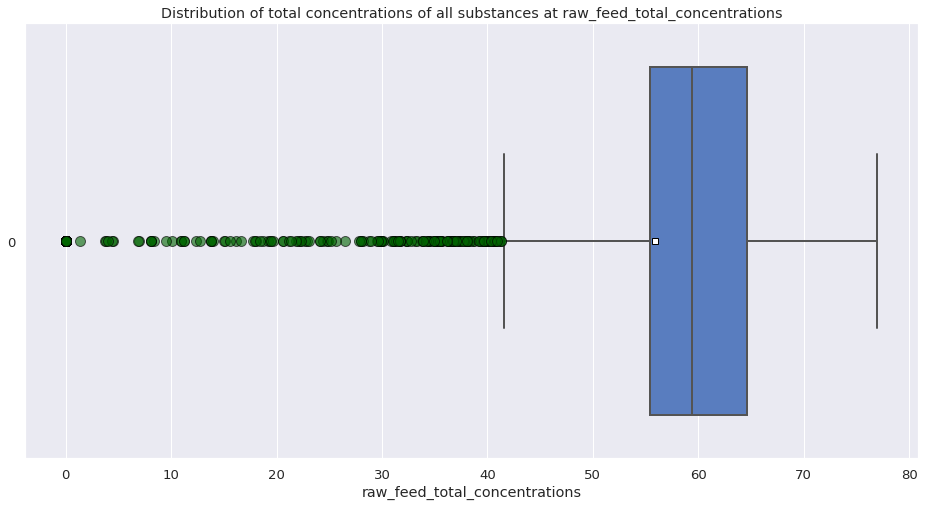

In [53]:
# Calculate total concentrations of all substances at Raw Feed stage in test dataset - df_test
list_of_columns = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au']
df_test = calc_n_plot_total_concentrations(df_test, 'raw_feed_total_concentrations', list_of_columns, 'orchid')

# Get the first five records of the dataset
df_test.head()

#### Conclusion

**Raw Feed Stage**
- The total concentrations of all substances in the test set - `df_test` is calculated in a new feature - `raw_feed_total_concentrations`.
- The total concentrations of all substances in the test set is **Left-Skewed** as the peak of the distribution is on the right side and the mean is less than the median.
- There are many outliers but there is an unusaul large spike in concentration of all substances at `0`. That's doesn't sound right.
- We will remove all the observations in the test set - `df_test` where `df_test['raw_feed_total_concentrations'] < 0.8`.

#### Remove the anomalies

According to the conclusions above, let's filter the observations from the test set - `df_test`:

In [54]:
# Filter the test set of all the anomalies detected in the conclusion above
df_test = df_test[df_test['raw_feed_total_concentrations'] >= 0.8]

# Get the shape of the updated dataset
df_test.shape

(5485, 54)

# 7. Build the model <a id='build-the-model'></a>  
[Back to Contents](#contents)

## Prepare training and test datasets <a id='prepare-training-and-test-datasets'></a>  
[Back to Contents](#contents)

Let's prepare the training and test datasets for training and testing ML models. But, before we do that, let's have a quick look again into the information about `df_train` and `df_test`:

In [55]:
# Get information about the training dataset - df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13789 entries, 0 to 16859
Data columns (total 90 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                13789 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         13789 non-null  float64       
 2   final.output.concentrate_pb                         13789 non-null  float64       
 3   final.output.concentrate_sol                        13789 non-null  float64       
 4   final.output.concentrate_au                         13789 non-null  float64       
 5   final.output.recovery                               13789 non-null  float64       
 6   final.output.tail_ag                                13789 non-null  float64       
 7   final.output.tail_pb                                13789 non-null  float64       
 8   final.

In [56]:
# Get information about the test dataset - df_test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5485 entries, 0 to 5855
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5485 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5485 non-null   float64       
 2   primary_cleaner.input.depressant            5485 non-null   float64       
 3   primary_cleaner.input.feed_size             5485 non-null   float64       
 4   primary_cleaner.input.xanthate              5485 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5485 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5485 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5485 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5485 non-null   float64       
 9   primary_

Great! Let's proceed with our dataset preparation.

### Remove all the extra added columns while calculating total concentrations from the training and test set

We added three columns to the the training set - `df_train` - `raw_feed_total_concentrations`, `rougher_concentrate_total_concentrations` and `final_concentrate_total_concentrations`. Let's remove them:

In [57]:
# Remove extra columns from df_train
columns_to_drop = ['raw_feed_total_concentrations', 'rougher_concentrate_total_concentrations', 'final_concentrate_total_concentrations']
df_train = df_train.drop(columns_to_drop, axis=1)

In [58]:
# Get information about df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13789 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                13789 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         13789 non-null  float64       
 2   final.output.concentrate_pb                         13789 non-null  float64       
 3   final.output.concentrate_sol                        13789 non-null  float64       
 4   final.output.concentrate_au                         13789 non-null  float64       
 5   final.output.recovery                               13789 non-null  float64       
 6   final.output.tail_ag                                13789 non-null  float64       
 7   final.output.tail_pb                                13789 non-null  float64       
 8   final.

Awesome! We also added one column to the test dataset - `df_test` - `raw_feed_total_concentrations`. Let's git rid of that too:

In [59]:
# Remove extra columns from df_test
df_test = df_test.drop(['raw_feed_total_concentrations'], axis=1)

In [60]:
# Get information about df_test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5485 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5485 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5485 non-null   float64       
 2   primary_cleaner.input.depressant            5485 non-null   float64       
 3   primary_cleaner.input.feed_size             5485 non-null   float64       
 4   primary_cleaner.input.xanthate              5485 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5485 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5485 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5485 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5485 non-null   float64       
 9   primary_

Awesome! Let's proceed.

### Remove columns from the training set that are not present in the test set

We have analyzed before that there are few columns that are present in the training set - `df_train`, but not in the test set - `df_test` and we have already saved the list of such columns in a separate list - `cols_not_present_in_test`. Let's see again what are those columns -

In [61]:
cols_not_present_in_test

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Great! We can drop the columns that are not present in the test set - `df_test`, from the training set - `df_train` also. But, we have to predict two features - `rougher.output.recovery` and `final.output.recovery`, so before dropping th column difference, we can remove thgese two columns from the list of column difference - `cols_not_present_in_test`:

In [62]:
# Remove rougher.output.recovery and final.output.recovery from the list cols_not_present_in_test
cols_not_present_in_test.remove('rougher.output.recovery')
cols_not_present_in_test.remove('final.output.recovery')

In [63]:
# Print the list - cols_not_present_in_test
cols_not_present_in_test

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'secondary_cleane

In [64]:
# Drop cols_not_present_in_test from the training set - df_train
df_train = df_train.drop(cols_not_present_in_test, axis=1)

In [65]:
# Get list of columns from df_train
display(df_train.columns)

Index(['date', 'final.output.recovery', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.output.recovery',
       'rougher.state.floatbank10_

In [66]:
# Get the count of no of columns in df_train
df_train.shape

(13789, 55)

### Get values of targets in the test set from the source set

Clearly, we have to two targets - `rougher.output.recovery` and `final.output.recovery`. But, our test set - `df_test` doesn't have either of them as they are output related columns. We'll need both the features for validation purposes.

We also know that we have full data in source set - `df_source` and we have a common column - `date` in both the source set - `df_source` and test set - `df_test`. We can make use of it to merge the datasets to retrieve the values for the targets. Let's go.

Let's peek into the source dataset - `df_source`:

In [67]:
# Get first 10 records of df_source
df_source.head(10)

date  final.output.concentrate_ag  \
0 2016-01-15 00:00:00                     6.055403   
1 2016-01-15 01:00:00                     6.029369   
2 2016-01-15 02:00:00                     6.055926   
3 2016-01-15 03:00:00                     6.047977   
4 2016-01-15 04:00:00                     6.148599   
5 2016-01-15 05:00:00                     6.482968   
6 2016-01-15 06:00:00                     6.533849   
7 2016-01-15 07:00:00                     6.130823   
8 2016-01-15 08:00:00                     5.834140   
9 2016-01-15 09:00:00                     5.687063   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   
5                    10.049416                      5.480257   
6                    10.058141                      4.569100   
7                     9.935481                      4.389813   
8                    10.071156                      4.876389   
9                     9.980404                      5.282514   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   
5                    41.633678              69.465816             10.182708   
6                    41.995316              69.300835             10.304598   
7                    42.452727              70.230976             10.443288   
8                    43.404078              69.688595             10.420140   
9                    43.235220              70.279619             10.487013   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  \
0              0.895447              16.904297              2.143149   
1              0.927452              16.634514              2.224930   
2              0.953716              16.208849              2.257889   
3              0.883763              16.532835              2.146849   
4              0.792826              16.525686              2.055292   
5              0.664118              16.999638              1.918586   
6              0.807342              16.723575              2.058913   
7              0.949346              16.689959              2.143437   
8              1.065453              17.201948              2.209881   
9              1.159805              17.483979              2.209593   

   primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                     127.092003                         10.128295   
1                     125.629232                         10.296251   
2                     123.819808                         11.316280   
3                     122.270188                         11.322140   
4                     117.988169                         11.913613   
5                     115.581252                         12.470773   
6                     117.322323                         12.469088   
7                     124.592960                         12.467403   
8                     131.781026                         12.465718   
9                     138.120409                         12.464032   

   primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                             7.25                        0.988759   
1                             7.25                        1.002663   
2                             7.25                        0.991265   
3  

Let's peek into the test dataset - `df_test`:

In [68]:
# Get first 10 records of df_test
df_test.head(10)

date  primary_cleaner.input.sulfate  \
0 2016-09-01 00:59:59                     210.800909   
1 2016-09-01 01:59:59                     215.392455   
2 2016-09-01 02:59:59                     215.259946   
3 2016-09-01 03:59:59                     215.336236   
4 2016-09-01 04:59:59                     199.099327   
5 2016-09-01 05:59:59                     168.485085   
6 2016-09-01 06:59:59                     144.133440   
7 2016-09-01 07:59:59                     133.513396   
8 2016-09-01 08:59:59                     133.735356   
9 2016-09-01 09:59:59                     126.961069   

   primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                         14.993118                         8.080000   
1                         14.987471                         8.080000   
2                         12.884934                         7.786667   
3                         12.006805                         7.640000   
4                         10.682530                         7.530000   
5                          8.817007                         7.420000   
6                          7.924610                         7.420000   
7                          8.055252                         6.988000   
8                          7.999618                         6.935000   
9                          8.017856                         7.030000   

   primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                        1.005021                             1398.981301   
1                        0.990469                             1398.777912   
2                        0.996043                             1398.493666   
3                        0.863514                             1399.618111   
4                        0.805575                             1401.268123   
5                        0.791191                             1402.826803   
6                        0.788838                             1398.252401   
7                        0.801871                             1401.669677   
8                        0.789329                             1402.358981   
9                        0.805298                             1400.816120   

   primary_cleaner.state.floatbank8_a_level  \
0                               -500.225577   
1                               -500.057435   
2                               -500.868360   
3                               -498.863574   
4                               -500.808305   
5                               -499.299521   
6                               -499.748672   
7                               -501.777839   
8                               -499.981597   
9                               -499.014158   

   primary_cleaner.state.floatbank8_b_air  \
0                             1399.144926   
1                             1398.055362   
2                             1398.860436   
3                             1397.440120   
4                             1398.128818   
5                             1401.511119   
6                             1393.255503   
7                             1400.754446   
8                             1400.985954   
9                             1399.975401   

   primary_cleaner.state.floatbank8_b_level  \
0                               -499.919735   
1                               -499.778182   
2                               -499.764529   
3                               -499.211024   
4                               -499.504543   
5                               -499.205357   
6                               -499.195380   
7                               -502.514024   
8                               -496.802968   
9                               -499.570552   

   primary_cleaner.state.floatbank8_c_air  \
0                             1400.102998   
1                             1396.151033   
2                             1398.075709   
3                             1400.129303   
4 

Let's merge the two datasets such to get a new test set with the required targets:

In [69]:
# Merge source set - df_source with test set - df_test on date column
df_source_to_merge = df_source[['date', 'rougher.output.recovery', 'final.output.recovery']]
df_test_derived = pd.merge(df_source_to_merge, df_test, how='inner', on='date')

In [70]:
# Get the shape of new test set - df_test_derived
df_test_derived.shape

(5154, 55)

Awesome! Let's validate the columns in the new test set - `df_test_derived`:

In [71]:
# Get the information about the new test set
df_test_derived.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5154 entries, 0 to 5153
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5154 non-null   datetime64[ns]
 1   rougher.output.recovery                     5154 non-null   float64       
 2   final.output.recovery                       5154 non-null   float64       
 3   primary_cleaner.input.sulfate               5154 non-null   float64       
 4   primary_cleaner.input.depressant            5154 non-null   float64       
 5   primary_cleaner.input.feed_size             5154 non-null   float64       
 6   primary_cleaner.input.xanthate              5154 non-null   float64       
 7   primary_cleaner.state.floatbank8_a_air      5154 non-null   float64       
 8   primary_cleaner.state.floatbank8_a_level    5154 non-null   float64       
 9   primary_

Awesome! We are in good state now. One last thing to do is to drop `date` column from the training set - `df_train` and the test set - `df_test_derived` as `date` column is not needed to calculate the required targets.

In [72]:
# Drop date from test set - df_test_derived
df_test_derived = df_test_derived.drop(['date'], axis=1)
df_test_derived.columns

Index(['rougher.output.recovery', 'final.output.recovery',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       

In [73]:
# Drop date from training set - df_train
df_train = df_train.drop(['date'], axis=1)
df_train.columns

Index(['final.output.recovery', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.output.recovery',
       'rougher.state.floatbank10_a_air', 

Awesome! Let's proceed.

### Divide the training and test sets into features and targets

After all the data processing, now is the time to divide the training - `df_train` and test sets - `df_test_derived` into features and targets:

In [74]:
# For the sake of simplicity, let's rename our derived test set - df_test_derived to df_test
df_test = df_test_derived

Let's divide the training set - `df_train` into features and target:

In [75]:
# Divide the training set into features and target
targets = ['rougher.output.recovery', 'final.output.recovery']

df_train_features = df_train.drop(targets, axis=1)
df_train_targets = df_train[targets]

In [76]:
# Verify df_train_features shape
df_train_features.shape

(13789, 52)

In [77]:
# Verify df_train_features list of columns
df_train_features.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

In [78]:
# Verify df_train_targets shape
df_train_targets.shape

(13789, 2)

In [79]:
# Verify df_train_targets list of columns
df_train_targets.columns

Index(['rougher.output.recovery', 'final.output.recovery'], dtype='object')

Let's divide the test set - `df_test` into features and target:

In [80]:
# Divide the test set into features and target
targets = ['rougher.output.recovery', 'final.output.recovery']

df_test_features = df_test.drop(targets, axis=1)
df_test_targets = df_test[targets]

In [81]:
# Verify df_test_features shape
df_test_features.shape

(5154, 52)

In [82]:
# Verify df_test_features list of columns
df_test_features.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

In [83]:
# Verify df_test_targets shape
df_test_targets.shape

(5154, 2)

In [84]:
# Verify df_test_targets list of columns
df_test_targets.columns

Index(['rougher.output.recovery', 'final.output.recovery'], dtype='object')

## Check if we need any encoding? <a id='check-for-encoding'></a>  
[Back to Contents](#contents)

Since, all the features we have in training set - `df_train` and target set - `df_target` are numerical features, we don't need any data encoding.

## Feature Scaling<a id='feature-scaling'></a>  
[Back to Contents](#contents)

Feature scaling is an important preprocessing step in machine learning. Scaling the features ensures that all input variables are on a similar scale, preventing some features from dominating others in the model training process. When dealing with numerical features with different ranges or units, feature scaling becomes necessary to achieve better model performance and convergence.  

The `StandardScaler` from the `sklearn.preprocessing` module in `scikit-learn` is a feature scaling technique used to standardize numerical features. Standardization transforms the features so that they have a mean of 0 and a standard deviation of 1. This process is essential for algorithms that rely on distance-based calculations or gradient-based optimization, as it ensures that all features are on a similar scale.

**Key points about `StandardScaler`**:

1. **Fit and Transform**: The `StandardScaler` is an instance of a transformer in `scikit-learn`. It follows the same fit and transform paradigm as other preprocessing techniques. First, it is fitted to the training data using the `fit()` method to compute the mean and standard deviation of each feature. Then, the `transform()` method is used to transform the training data and any subsequent data using the computed mean and standard deviation.

2. **Standardized Features**: After applying the `StandardScaler`, each feature in the dataset will have a mean of 0 and a standard deviation of 1.

3. **No Impact on Categorical Features**: The `StandardScaler` should only be used for numerical features. It does not affect categorical features or features that have a constant value across all samples.

We have all the numerical features, so we're good. Let's proceed with scaling the features:

In [85]:
scaler = StandardScaler()
scaler.fit(df_train_features)

StandardScaler()

In [86]:
# Standardize all the features
pd.options.mode.chained_assignment = None
df_train_features = scaler.transform(df_train_features)
df_test_features = scaler.transform(df_test_features)

## Write a function to calculate the final sMAPE value <a id='smape-function'></a>  
[Back to Contents](#contents)

**sMAPE** is called **symmetric Mean Absolute Percentage Error**. It is similar to MAE, but is expressed in relative values instead of absolute ones. It equally takes into account the scale of both the target and the prediction.
Here’s how **sMAPE** is calculated:  
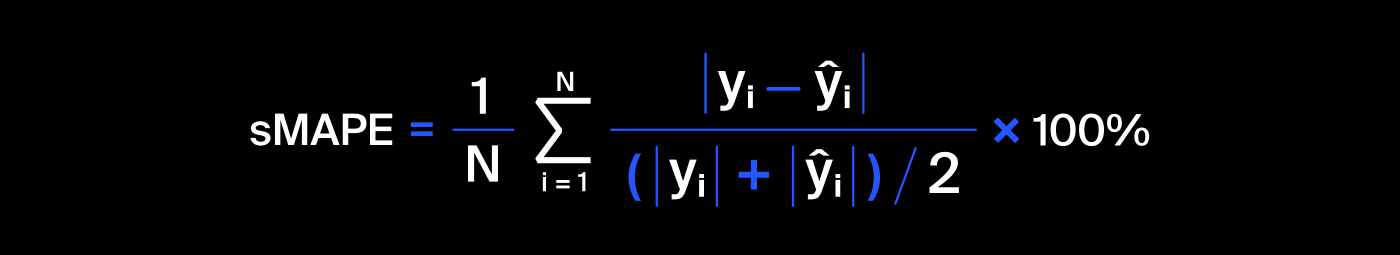

Denotation:  
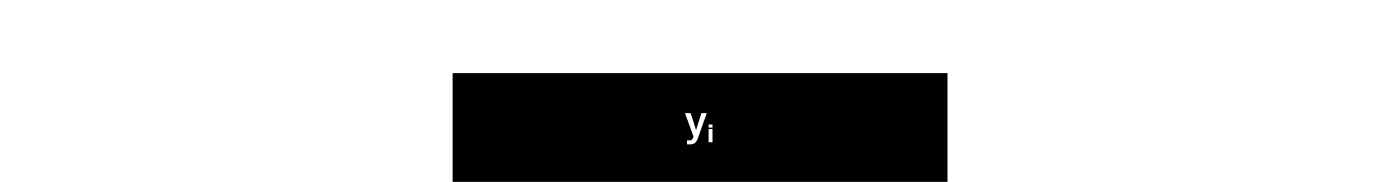
Value of target for the observation with the i index in the sample used to measure quality.  

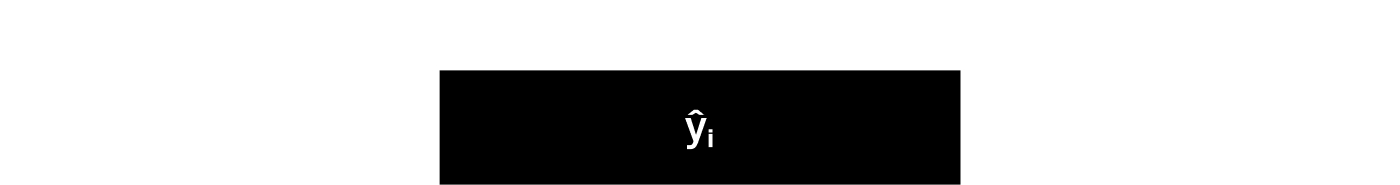
Value of prediction for the observation with the i index, for example, in the test sample.  

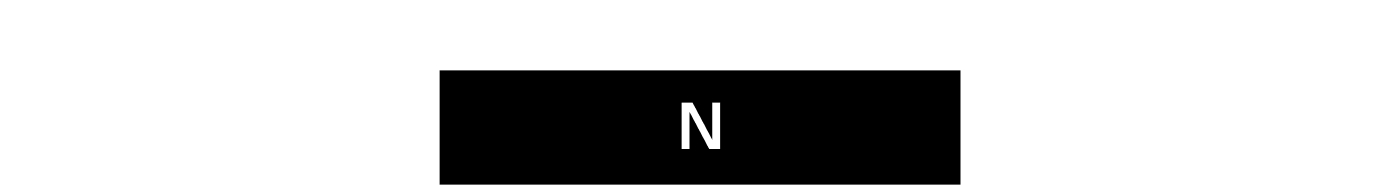
Number of observations in the sample.  

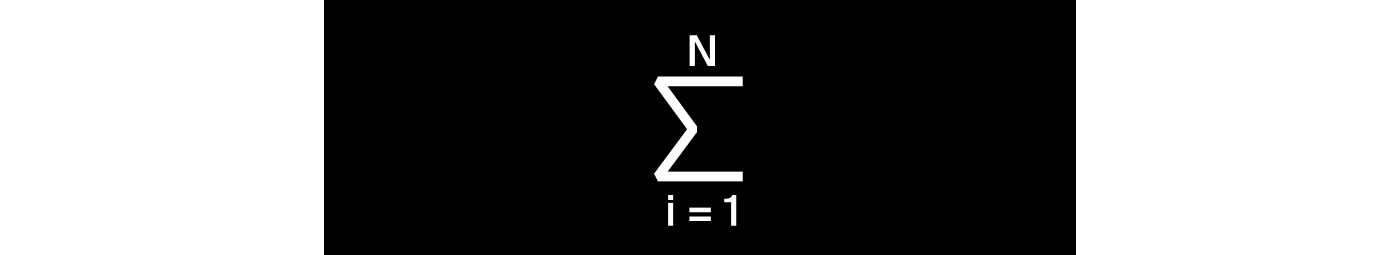
Summation over all observations of the sample (i takes values from 1 to N).  

As we already know, we need to predict two values:
- rougher concentrate recovery: `rougher.output.recovery`
- final concentrate recovery: `final.output.recovery`

The final metric includes the two values:  
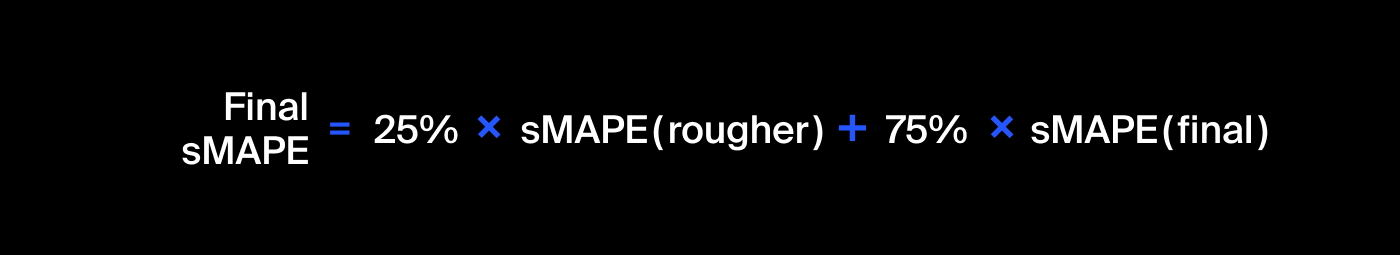

So, let's write functions to calculate the both - **sMAPE** and **final sMAPE**:

In [87]:
# Function to calculate smape evaluation metric
def calculate_smape(target: pd.Series, prediction: pd.Series) -> float:
    
    """
    This function:
    1. Takes the target actual series of values for a column & the predicted series of values for that column
    2. Calculates the smape
    3. Returns smape for the column
    """
    
    N = len(target)
    smape = ((abs(target-prediction) / ((abs(target) + abs(prediction)) / 2)).sum() / N) * 100
    
    return smape

In [88]:
# Function to final smape evaluation metric
def calculate_final_smape(smape_rougher: float, smape_final: float) -> float:
        
    """
    This function:
    1. Takes the smapes for rougher.output.recovery & final.output.recovery
    2. Calculates the final smape
    3. Returns the final smape
    """
    
    final_smape = (0.25 * smape_rougher) + (0.75 * smape_final)
    return final_smape

Let's make a scorer from `calculate_smape` function that we've just defined:

In [89]:
smape_score = make_scorer(calculate_smape)

## Train different models <a id='train-different-models'></a>  
[Back to Contents](#contents)

Now, when we have datasets ready after data processing, we can proceed with training our ML models. **Since, our targets are numerical and continous, this is a Regression task**.

### Decision Tree Regression model

Let's build and cross evaluate the model for the `rougher.output.recovery` first:

In [90]:
# Training Decision Tree Regressor Model on training set for rougher.output.recovery

best_decision_tree_regressor_model = None
max_depth = 0
best_rougher_cross_validn_score = -1000000

# Change max_depth hyperparameter from 1 to 10 & find at what depth the model is the most accurate
for depth in range(1, 11):
    # Instantiate a model with max_depth = depth
    current_decision_tree_regressor_model = DecisionTreeRegressor(max_depth=depth, random_state=98765)
    
    # Cross validate the current model using smape as scoring function
    rougher_cross_validn_score = cross_val_score(current_decision_tree_regressor_model, df_train_features, df_train_targets['rougher.output.recovery'], cv=5, scoring=smape_score)
    mean_rougher_cross_validn_score = rougher_cross_validn_score.mean()
    
    # Check for the best model until the current iteration
    if(best_rougher_cross_validn_score < mean_rougher_cross_validn_score):
        best_rougher_cross_validn_score = mean_rougher_cross_validn_score
        max_depth = depth
        best_decision_tree_regressor_model = current_decision_tree_regressor_model

# Print the metrics for rougher.output.recovery
print('Decision Tree Regressor Model on training set for rougher.output.recovery')
print('-'*100)
print(f'Maximum depth of the best Decision Tree Regressor Model is {max_depth}')
print(f'The best mean cross validation score using sMAPE on rougher.output.recovery is {best_rougher_cross_validn_score}')

# Save the best Decision Tree Classifer model
dump(best_decision_tree_regressor_model, 'best_decision_tree_regressor_model_rougher.joblib')

# OUTPUT
# Decision Tree Regressor Model on training set for rougher.output.recovery
# ----------------------------------------------------------------------------------------------------
# Maximum depth of the best Decision Tree Regressor Model is 10
# The best mean cross validation score using sMAPE on rougher.output.recovery is 10.099352299778099

Decision Tree Regressor Model on training set for rougher.output.recovery
----------------------------------------------------------------------------------------------------
Maximum depth of the best Decision Tree Regressor Model is 10
The best mean cross validation score using sMAPE on rougher.output.recovery is 10.099352299778099


['best_decision_tree_regressor_model_rougher.joblib']

Now, let's build and cross evaluate the model for the `final.output.recovery`:

In [91]:
# Training Decision Tree Regressor Model on training set for final.output.recovery

best_decision_tree_regressor_model = None
max_depth = 0
best_final_cross_validn_score = -1000000

# Change max_depth hyperparameter from 1 to 10 & find at what depth the model is the most accurate
for depth in range(1, 11):
    # Instantiate a model with max_depth = depth
    current_decision_tree_regressor_model = DecisionTreeRegressor(max_depth=depth, random_state=98765)
    
    # Cross validate the current model using smape as scoring function
    final_cross_validn_score = cross_val_score(current_decision_tree_regressor_model, df_train_features, df_train_targets['final.output.recovery'], cv=5, scoring=smape_score)
    mean_final_cross_validn_score = final_cross_validn_score.mean()
    
    # Check for the best model until the current iteration
    if(best_final_cross_validn_score < mean_final_cross_validn_score):
        best_final_cross_validn_score = mean_final_cross_validn_score
        max_depth = depth
        best_decision_tree_regressor_model = current_decision_tree_regressor_model

# Print the metrics for rougher.output.recovery
print('Decision Tree Regressor Model on training set for final.output.recovery')
print('-'*100)
print(f'Maximum depth of the best Decision Tree Regressor Model is {max_depth}')
print(f'The best mean cross validation score using sMAPE on final.output.recovery is {best_final_cross_validn_score}')

# Save the best Decision Tree Classifer model
dump(best_decision_tree_regressor_model, 'best_decision_tree_regressor_model_final.joblib')

# OUTPUT
# Decision Tree Regressor Model on training set for final.output.recovery
# ----------------------------------------------------------------------------------------------------
# Maximum depth of the best Decision Tree Regressor Model is 10
# The best mean cross validation score using sMAPE on final.output.recovery is 13.150173765235163

Decision Tree Regressor Model on training set for final.output.recovery
----------------------------------------------------------------------------------------------------
Maximum depth of the best Decision Tree Regressor Model is 10
The best mean cross validation score using sMAPE on final.output.recovery is 13.150173765235163


['best_decision_tree_regressor_model_final.joblib']

### Random Forest Regression model

Let's build and cross evaluate the model for the `rougher.output.recovery` first:

In [92]:
# Training Random Forest Regressor Model on training set for rougher.output.recovery

best_random_forest_regressor_model = None
best_no_of_estimators = 0
max_depth = 0
best_rougher_cross_validn_score = -1000000

# Change n_estimators hyperparameter from 10 to 180 (increment by 10 steps)
# And find how many number of trees the ensemble should have for the model to be the most accurate
for no_of_estimators in range(10, 50, 10):
    for depth in range(1, 8):
        # Instantiate a model with n_estimators = no_of_estimators (used to set number of trees in the ensemble)
        current_random_forest_regressor_model = RandomForestRegressor(n_estimators=no_of_estimators, max_depth=depth, random_state=98765)

        # Cross validate the current model using smape as scoring function
        rougher_cross_validn_score = cross_val_score(current_random_forest_regressor_model, df_train_features, df_train_targets['rougher.output.recovery'], cv=5, scoring=smape_score)
        mean_rougher_cross_validn_score = rougher_cross_validn_score.mean()

        # Check for the best model until the current iteration
        if(best_rougher_cross_validn_score < mean_rougher_cross_validn_score):
            best_rougher_cross_validn_score = mean_rougher_cross_validn_score
            best_no_of_estimators = no_of_estimators
            max_depth = depth
            best_random_forest_regressor_model = current_random_forest_regressor_model

# Print the metrics for rougher.output.recovery
print('Random Forest Regressor Model on training set for rougher.output.recovery')
print('-'*100)
print(f'Maximum depth of the best Random Forest Regressor Model is {max_depth}')
print(f'Maximum no of estimators in the best Random Forest Regressor Model is {best_no_of_estimators}')
print(f'The best mean cross validation score using sMAPE on rougher.output.recovery is {best_rougher_cross_validn_score}')

# Save the best Random Forest Regressor Model
dump(best_random_forest_regressor_model, 'best_random_forest_regressor_model_rougher.joblib')

# OUTPUT
# Note: Time taken to run is approx. 20 mins.
# Random Forest Regressor Model on training set for rougher.output.recovery
# ----------------------------------------------------------------------------------------------------
# Maximum depth of the best Random Forest Regressor Model is 1
# Maximum no of estimators in the best Random Forest Regressor Model is 20
# The best mean cross validation score using sMAPE on rougher.output.recovery is 7.7461854337382565

Now, let's build and cross evaluate the model for the `final.output.recovery`:

In [93]:
# Training Random Forest Regressor Model on training set for final.output.recovery

best_random_forest_regressor_model = None
best_no_of_estimators = 0
max_depth = 0
best_final_cross_validn_score = -1000000

# Change n_estimators hyperparameter from 10 to 180 (increment by 10 steps)
# And find how many number of trees the ensemble should have for the model to be the most accurate
for no_of_estimators in range(10, 50, 10):
    for depth in range(1, 8):
        # Instantiate a model with n_estimators = no_of_estimators (used to set number of trees in the ensemble)
        current_random_forest_regressor_model = RandomForestRegressor(n_estimators=no_of_estimators, max_depth=depth, random_state=98765)

        # Cross validate the current model using smape as scoring function
        final_cross_validn_score = cross_val_score(current_random_forest_regressor_model, df_train_features, df_train_targets['final.output.recovery'], cv=5, scoring=smape_score)
        mean_final_cross_validn_score = final_cross_validn_score.mean()

        # Check for the best model until the current iteration
        if(best_final_cross_validn_score < mean_final_cross_validn_score):
            best_final_cross_validn_score = mean_final_cross_validn_score
            best_no_of_estimators = no_of_estimators
            max_depth = depth
            best_random_forest_regressor_model = current_random_forest_regressor_model

# Print the metrics for rougher.output.recovery
print('Random Forest Regressor Model on training set for final.output.recovery')
print('-'*100)
print(f'Maximum depth of the best Random Forest Regressor Model is {max_depth}')
print(f'Maximum no of estimators in the best Random Forest Regressor Model is {best_no_of_estimators}')
print(f'The best mean cross validation score using sMAPE on final.output.recovery is {best_final_cross_validn_score}')

# Save the best Random Forest Regressor Model
dump(best_random_forest_regressor_model, 'best_random_forest_regressor_model_final.joblib')

# OUTPUT
# Note: Time taken to run is approx. 20 mins.
# Random Forest Regressor Model on training set for final.output.recovery
# ----------------------------------------------------------------------------------------------------
# Maximum depth of the best Random Forest Regressor Model is 1
# Maximum no of estimators in the best Random Forest Regressor Model is 10
# The best mean cross validation score using sMAPE on final.output.recovery is 9.645836539364334

### Linear Regression model

Let's build and cross evaluate the model for the `rougher.output.recovery` first:

In [94]:
# Training Linear Regression Model on training data for rougher.output.recovery

# Instantiate a model
linear_regression_model = LinearRegression()

# Cross validate the current model using smape as scoring function
rougher_cross_validn_score = cross_val_score(linear_regression_model, df_train_features, df_train_targets['rougher.output.recovery'], cv=5, scoring=smape_score)
mean_rougher_cross_validn_score = rougher_cross_validn_score.mean()

# Print the metrics for rougher.output.recovery
print('Linear Regression Model on training set for rougher.output.recovery')
print('-'*100)
print(f'The best mean cross validation score using sMAPE on rougher.output.recovery is {mean_rougher_cross_validn_score}')

# Save the Logistic Regression model
dump(linear_regression_model, 'linear_regression_model_rougher.joblib')

# OUTPUT
# Linear Regression Model on training set for rougher.output.recovery
# ----------------------------------------------------------------------------------------------------
# The best mean cross validation score using sMAPE on rougher.output.recovery is 7.151667003698333

Linear Regression Model on training set for rougher.output.recovery
----------------------------------------------------------------------------------------------------
The best mean cross validation score using sMAPE on rougher.output.recovery is 7.151667003698333


['linear_regression_model_rougher.joblib']

Now, let's build and cross evaluate the model for the `final.output.recovery`:

In [95]:
# Training Linear Regression Model on training data for final.output.recovery

# Instantiate a model
linear_regression_model = LinearRegression()

# Cross validate the current model using smape as scoring function
final_cross_validn_score = cross_val_score(linear_regression_model, df_train_features, df_train_targets['final.output.recovery'], cv=5, scoring=smape_score)
mean_final_cross_validn_score = final_cross_validn_score.mean()

# Print the metrics for final.output.recovery
print('Linear Regression Model on training set for final.output.recovery')
print('-'*100)
print(f'The best mean cross validation score using sMAPE on final.output.recovery is {mean_final_cross_validn_score}')

# Save the Logistic Regression model
dump(linear_regression_model, 'linear_regression_model_rougher.joblib')

# OUTPUT
# Linear Regression Model on training set for final.output.recovery
# ----------------------------------------------------------------------------------------------------
# The best mean cross validation score using sMAPE on final.output.recovery is 10.963942820286519

Linear Regression Model on training set for final.output.recovery
----------------------------------------------------------------------------------------------------
The best mean cross validation score using sMAPE on final.output.recovery is 10.963942820286519


['linear_regression_model_rougher.joblib']

## Pick the best model and test it using the test sample <a id='pick-the-best-model'></a>  
[Back to Contents](#contents)

It seems that the Linear Regressor model is the best for `rougher.output.recovery` with the best mean cross validation score using sMAPE, being `7.151667003698333`. So, let's train the model on the training set and test it using the test sample.

In [96]:
# Instantiate the model
linear_regression_model_rougher = LinearRegression()

# Fit the model on training set
linear_regression_model_rougher.fit(df_train_features, df_train_targets['rougher.output.recovery'])

# Predict the target using the test set features
predictions_rougher = linear_regression_model_rougher.predict(df_test_features)

# Calculate & print the evaluation metrics
mae_rougher = mean_absolute_error(df_test_targets['rougher.output.recovery'], predictions_rougher)
rmse_rougher = np.sqrt(mean_squared_error(df_test_targets['rougher.output.recovery'],  predictions_rougher))
smape_rougher = calculate_smape(df_test_targets['rougher.output.recovery'],  predictions_rougher)

print('Evaluation Metrics for rougher.output.recovery')
print('MAE:', mae_rougher)
print('RMSE:', rmse_rougher)
print('sMAPE:', smape_rougher)

Evaluation Metrics for rougher.output.recovery
MAE: 3.988669331350686
RMSE: 5.423664800598493
sMAPE: 4.785122692163749


It seems that the Random Forest Regressor model is the best for `final.output.recovery` with a maximum depth of `1`, the optimum number of estimators being `10` and random state of `98765`. So, let's train the model on the training set with the listed hyper parameters and test it using the test sample.

In [97]:
# Instantiate the model with n_estimators = 1, depth = 40, random_state = 98765
random_forest_regressor_model_final = RandomForestRegressor(n_estimators=10, max_depth=1, random_state=98765)

# Fit the model on training set
random_forest_regressor_model_final.fit(df_train_features, df_train_targets['final.output.recovery'])

# Predict the target using the test set features
predictions_final = random_forest_regressor_model_final.predict(df_test_features)

# Calculate & print the evaluation metrics
mae_final = mean_absolute_error(df_test_targets['final.output.recovery'], predictions_final)
rmse_final = np.sqrt(mean_squared_error(df_test_targets['final.output.recovery'],  predictions_final))
smape_final = calculate_smape(df_test_targets['final.output.recovery'],  predictions_final)

print('Evaluation Metrics for final.output.recovery')
print('MAE:', mae_final)
print('RMSE:', rmse_final)
print('sMAPE:', smape_final)

Evaluation Metrics for final.output.recovery
MAE: 5.377866649251351
RMSE: 7.575718323948654
sMAPE: 8.026958575021604


Great! Now. let's calculate the **final sMAPE** metric:

In [98]:
# Calculate final sMAPE
final_smape = calculate_final_smape(smape_rougher, smape_final)
print('The final sMAPE metric is ', final_smape)

The final sMAPE metric is  7.216499604307141


- **Rougher Concentrate Recovery Predictions**: The MAE of `3.988669331350686` and the RMSE of `5.423664800598493` indicate the average magnitude of error in your `rougher.output.recovery` predictions. The sMAPE of `4.785122692163749` suggest that the model's predictions for `rougher.output.recovery` are reasonably accurate, with low-to-moderate error levels.

- **Final Concentrate Recovery Predictions**: The MAE of `5.377866649251351` and the RMSE of `7.575718323948654` indicate the average magnitude of error in your `rougher.output.recovery` predictions. The sMAPE of `8.026958575021604` suggest that the model's predictions for `rougher.output.recovery` are reasonably accurate, with low-to-moderate error levels.

- **Final sMAPE Metric**: The final sMAPE metric of `7.216499604307141` combines the rougher and final recovery predictions, weighted at 25% and 75%, respectively.

### Compare the results with a Baseline model using `DummyRegressor()`

Above metrics looks great, but let's train a Baseline model and predict targets using that and calculate the metrics so that we can evalutae if our model is really giving meaningful results. Let's go:

In [100]:
# Instantiate the model
dummy_model_rougher = DummyRegressor()
dummy_model_final = DummyRegressor()

# Fit the model on training set
dummy_model_rougher.fit(df_train_features, df_train_targets['rougher.output.recovery'])
dummy_model_final.fit(df_train_features, df_train_targets['final.output.recovery'])

# Predict the target using the test set features
predictions_rougher = dummy_model_rougher.predict(df_test_features)
predictions_final = dummy_model_final.predict(df_test_features)

# Calculate & print the evaluation metrics
mae_rougher = mean_absolute_error(df_test_targets['rougher.output.recovery'], predictions_rougher)
rmse_rougher = np.sqrt(mean_squared_error(df_test_targets['rougher.output.recovery'],  predictions_rougher))
smape_rougher = calculate_smape(df_test_targets['rougher.output.recovery'],  predictions_rougher)

print('Evaluation Metrics for rougher.output.recovery')
print('MAE:', mae_rougher)
print('RMSE:', rmse_rougher)
print('sMAPE:', smape_rougher)

mae_final = mean_absolute_error(df_test_targets['final.output.recovery'], predictions_final)
rmse_final = np.sqrt(mean_squared_error(df_test_targets['final.output.recovery'],  predictions_final))
smape_final = calculate_smape(df_test_targets['final.output.recovery'],  predictions_final)

print('Evaluation Metrics for final.output.recovery')
print('MAE:', mae_final)
print('RMSE:', rmse_final)
print('sMAPE:', smape_final)

# Calculate final sMAPE
final_smape = calculate_final_smape(smape_rougher, smape_final)
print('The final sMAPE metric is ', final_smape)

Evaluation Metrics for rougher.output.recovery
MAE: 4.532732810763809
RMSE: 6.1164299587355995
sMAPE: 5.381335838090243
Evaluation Metrics for final.output.recovery
MAE: 5.756522190311417
RMSE: 7.713178652349511
sMAPE: 8.566859769615208
The final sMAPE metric is  7.7704787867339675


Great! Our baseline constant model always predicts mean of the targets, by default. So, it seems that our best picked up trained model has done a better job.

# 9. Conclusion <a id='conclusion'></a>  
[Back to Contents](#contents)

We opened the files and looked into the data and checked that recovery is calculated correctly. We also analyzed the features not available in the test set and performed data preprocessing. 

We analyzed how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.
- The concentration of gold (au) consistently rises from the initial `rougher.output stage` to the subsequent `final.output stage`.
- Silver (ag) concentration notably declines as purification advances, indicative of successful removal. Meanwhile, the concentration of lead (pb) remains relatively constant throughout the stages, suggesting minimal alteration during the purification process.

We compared the feed particle size distributions in the training set and in the test set. Our observations indicated a remarkable similarity in the average particle sizes. For example, the `rougher.input.feed_size` feature: the average particle size for the training set was 60, while for the test set it was 56. Similarly, for `primary_cleaner.input.feed_size`, the training set exhibited an average of 7.30, closely followed by the test set with an average of 7.26.

We analyzed the total concentrations of all substances at different stages:
**Raw Feed Stage**
- The total concentrations of all substances in the training set was **Left-Skewed**.
- There was an unusaul large spike in concentration of all substances at `0`.  We cleaned teh date of all anomalies.

**Rougher Concentrate Stage**
- The total concentrations of all substances in the training set was **Left-Skewed**.
- There was an unusaul large spike in concentration of all substances at `0`.  We cleaned teh date of all anomalies.

**Final Concentrate Stage**
- The total concentrations of all substances in the training set was **Left-Skewed**.
- There was an unusaul large spike in concentration of all substances at `0`.  We cleaned teh date of all anomalies.

We later trained the ML models, selected tthe best of them for each target and predicted the targets:
- **Rougher Concentrate Recovery Predictions**: The MAE of `3.988669331350686` and the RMSE of `5.423664800598493` indicate the average magnitude of error in your `rougher.output.recovery` predictions. The sMAPE of `4.785122692163749` suggest that the model's predictions for `rougher.output.recovery` are reasonably accurate, with low-to-moderate error levels.

- **Final Concentrate Recovery Predictions**: The MAE of `5.377866649251351` and the RMSE of `7.575718323948654` indicate the average magnitude of error in your `rougher.output.recovery` predictions. The sMAPE of `8.026958575021604` suggest that the model's predictions for `rougher.output.recovery` are reasonably accurate, with low-to-moderate error levels.

- **Final sMAPE Metric**: The final sMAPE metric of `7.216499604307141` combines the rougher and final recovery predictions, weighted at 25% and 75%, respectively.